# *+ Processing with CHM & RN & biomass data +*

# Load all data from .csv file

In [1]:
# Import main libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Load biomass dataset
biomass_data = '/home/dima/Desktop/JupyterLab/GIS and ML algoritms/5_Processing_data_for_level_sites/Main_CHM_spectral_Site2020.csv'
df = pd.read_csv(biomass_data)
df.head()

,Site #,WGS84 N,WGS 84 E,Origin,Origin_ID,Dominant_specias,Species_ID,Cs_wood_Bq/kg,ln_Cs_wood,Sr_wood_Bq/kg,...,idm_g_Q25,idm_g_Q50,idm_g_Q75,idm_b_MIN,idm_b_MAX,idm_b_MEAN,idm_b_STD,idm_b_Q25,idm_b_Q50,idm_b_Q75
0,1,51.435741,30.107979,n,0,Birch,2,920,6.824,10300,...,0.042167,0.050549,0.062270,0.017730,0.408966,0.059749,0.030217,0.043539,0.052312,0.064544
1,2,51.434093,30.108523,a,1,Pine,0,3600,8.189,15100,...,0.040919,0.048889,0.060698,0.020078,0.258602,0.057223,0.025515,0.043035,0.050941,0.062608
2,3,51.434163,30.109196,a,1,Pine,0,4360,8.380,14600,...,0.042397,0.050463,0.060603,0.020761,0.156265,0.056571,0.016629,0.045142,0.053495,0.064635
3,4,51.434217,30.110484,a,1,Pine,0,3420,8.137,12700,...,0.043719,0.052974,0.066027,0.017239,0.327465,0.060880,0.023964,0.046111,0.055601,0.069182
4,5,51.434056,30.111980,a,1,Pine,0,2200,7.696,12100,...,0.040659,0.049303,0.061803,0.014276,0.274420,0.057902,0.024283,0.043045,0.051566,0.065078


# List of all parameters for est. of bioproductivity and RN content
"""
All parameters:
'Cs_wood_Bq/kg', 'Sr_wood_Bq/kg', 'ln_Cs_wood', 'ln_Sr_wood', 'ln_Tag_Cs', 'ln_Tag_Sr',
'Cs_2021_kBq_m', 'Sr_2021_kBq_m', 'AEDR_mean', 'Distance_km', 'Azimuth',
'Gs_cub_m', 'M_stem_kg_m2', 'M_stem_bark_kg_m2', 'M_crown_kg_m2', 'M_foliage_kg_m2', 'M_AG_kg_m2',
'ln_Gs_cub_m', 'ln_M_stem_kg_m2', 'ln_M_stem_bark_kg_m2', 'ln_M_crown_kg_m2', 'ln_M_foliage_kg_m2', 'ln_M_AG_kg_m2',
'%_cover', 'af_chm_MIN', 'af_chm_MAX', 'af_chm_MEAN', 'af_chm_STD', 'af_chm_Q25', 'af_chm_Q50', 'af_chm_Q75', 
'mf_chm_MIN', 'mf_chm_MAX', 'mf_chm_MEAN', 'mf_chm_STD', 'mf_chm_Q25', 'mf_chm_Q50', 'mf_chm_Q75', 
'r_MIN', 'r_MAX', 'r_MEAN', 'r_STD', 'r_Q25', 'r_Q50', 'r_Q75', 
'g_MIN', 'g_MAX', 'g_MEAN', 'g_STD', 'g_Q25', 'g_Q50', 'g_Q75', 
'b_MIN', 'b_MAX', 'b_MEAN', 'b_STD', 'b_Q25', 'b_Q50', 'b_Q75', 
'asm_r__MIN', 'asm_r_MAX', 'asm_r_MEAN', 'asm_r_STD', 'asm_r_Q25', 'asm_r_Q50', 'asm_r_Q75', 
'asm_g__MIN', 'asm_g_MAX', 'asm_g_MEAN', 'asm_g_STD', 'asm_g_Q25', 'asm_g_Q50', 'asm_g_Q75', 
'asm_b__MIN', 'asm_b_MAX', 'asm_b_MEAN', 'asm_b_STD', 'asm_b_Q25', 'asm_b_Q50', 'asm_b_Q75', 
'contr_r_MIN', 'contr_r_MAX', 'contr_r_MEAN', 'contr_r_STD', 'contr_r_Q25', 'contr_r_Q50', 'contr_r_Q75', 
'contr_g_MIN', 'contr_g_MAX', 'contr_g_MEAN', 'contr_g_STD', 'contr_g_Q25', 'contr_g_Q50', 'contr_g_Q75', 
'contr_b_MIN', 'contr_b_MAX', 'contr_b_MEAN', 'contr_b_STD', 'contr_b_Q25', 'contr_b_Q50', 'contr_b_Q75', 
'corr_r_MIN', 'corr_r_MAX', 'corr_r_MEAN', 'corr_r_STD', 'corr_r_Q25', 'corr_r_Q50', 'corr_r_Q75', 
'corr_g_MIN', 'corr_g_MAX', 'corr_g_MEAN', 'corr_g_STD', 'corr_g_Q25', 'corr_g_Q50', 'corr_g_Q75', 
'corr_b_MIN', 'corr_b_MAX', 'corr_b_MEAN', 'corr_b_STD', 'corr_b_Q25', 'corr_b_Q50', 'corr_b_Q75', 
'idm_r_MIN', 'idm_r_MAX', 'idm_r_MEAN', 'idm_r_STD', 'idm_r_Q25', 'idm_r_Q50', 'idm_r_Q75', 
'idm_g_MIN', 'idm_g_MAX', 'idm_g_MEAN', 'idm_g_STD', 'idm_g_Q25', 'idm_g_Q50', 'idm_g_Q75', 
'idm_b_MIN', 'idm_b_MAX', 'idm_b_MEAN', 'idm_b_STD', 'idm_b_Q25', 'idm_b_Q50', 'idm_b_Q75'

"""

In [3]:
# Selecting main working parameters
select = pd.DataFrame(df, columns= ['ln_Cs_wood', 'ln_Sr_wood', 'Cs_2021_kBq_m', 'Sr_2021_kBq_m', 'ln_Tag_Cs', 'ln_Tag_Sr', 'AEDR_mean',
                                     'asm_r__MIN', 'asm_r_MAX', 'asm_r_MEAN', 'asm_r_STD', 'asm_r_Q25', 'asm_r_Q50', 'asm_r_Q75', 
                                    'asm_g__MIN', 'asm_g_MAX', 'asm_g_MEAN', 'asm_g_STD', 'asm_g_Q25', 'asm_g_Q50', 'asm_g_Q75', 
                                    'asm_b__MIN', 'asm_b_MAX', 'asm_b_MEAN', 'asm_b_STD', 'asm_b_Q25', 'asm_b_Q50', 'asm_b_Q75'])
            


# Show the first five columns
select.head()

,ln_Cs_wood,ln_Sr_wood,Cs_2021_kBq_m,Sr_2021_kBq_m,ln_Tag_Cs,ln_Tag_Sr,AEDR_mean,asm_r__MIN,asm_r_MAX,asm_r_MEAN,...,asm_g_Q25,asm_g_Q50,asm_g_Q75,asm_b__MIN,asm_b_MAX,asm_b_MEAN,asm_b_STD,asm_b_Q25,asm_b_Q50,asm_b_Q75
0,6.824,9.240,1912,784,-0.73,2.58,2.33,0.004790,0.020304,0.005212,...,0.004989,0.005070,0.005200,0.004800,0.026332,0.005252,0.000687,0.005010,0.005096,0.005233
1,8.189,9.622,2005,818,0.59,2.92,2.47,0.004805,0.013653,0.005186,...,0.004975,0.005048,0.005161,0.004805,0.012283,0.005200,0.000537,0.005001,0.005077,0.005205
2,8.380,9.589,2001,818,0.78,2.88,2.44,0.004799,0.007455,0.005114,...,0.004980,0.005057,0.005170,0.004817,0.007386,0.005142,0.000213,0.005010,0.005091,0.005207
3,8.137,9.449,2040,833,0.52,2.72,2.55,0.004799,0.015074,0.005196,...,0.004997,0.005089,0.005234,0.004800,0.016520,0.005228,0.000466,0.005024,0.005123,0.005285
4,7.696,9.401,1758,717,0.22,2.83,2.14,0.004798,0.012081,0.005158,...,0.004971,0.005048,0.005173,0.004810,0.012377,0.005190,0.000428,0.005000,0.005085,0.005226


# Pre-analysis of parameters

In [4]:
# Information on all columns of data frame
select.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ln_Cs_wood     103 non-null    float64
 1   ln_Sr_wood     103 non-null    float64
 2   Cs_2021_kBq_m  103 non-null    int64  
 3   Sr_2021_kBq_m  103 non-null    int64  
 4   ln_Tag_Cs      103 non-null    float64
 5   ln_Tag_Sr      103 non-null    float64
 6   AEDR_mean      103 non-null    float64
 7   asm_r__MIN     103 non-null    float64
 8   asm_r_MAX      103 non-null    float64
 9   asm_r_MEAN     103 non-null    float64
 10  asm_r_STD      103 non-null    float64
 11  asm_r_Q25      103 non-null    float64
 12  asm_r_Q50      103 non-null    float64
 13  asm_r_Q75      103 non-null    float64
 14  asm_g__MIN     103 non-null    float64
 15  asm_g_MAX      103 non-null    float64
 16  asm_g_MEAN     103 non-null    float64
 17  asm_g_STD      103 non-null    float64
 18  asm_g_Q25 

In [5]:
# Discribe statistic of forest sites by species and origin
df.groupby(['Dominant_specias'])['Cs_wood_Bq/kg', 'Sr_wood_Bq/kg'].describe()

/tmp/ipykernel_6341/725619848.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['Dominant_specias'])['Cs_wood_Bq/kg', 'Sr_wood_Bq/kg'].describe()


Cs_wood_Bq/kg                                                \
                         count          mean          std      min       25%   
Dominant_specias                                                               
Alder                      4.0   3353.250000  4978.217444    360.0    864.75   
Aspen                      1.0  86400.000000          NaN  86400.0  86400.00   
Birch                     23.0   4489.043478  7412.075967     93.0    565.00   
Oak                        3.0   2550.000000  2248.088077    420.0   1375.00   
Pine                      71.0   3452.535211  7193.888267     34.0    590.00   
Spruce                     1.0    177.000000          NaN    177.0    177.00   

                                            Sr_wood_Bq/kg                \
                      50%      75%      max         count          mean   
Dominant_specias                                                          
Alder              1126.5   3615.0  10800.0           4.0   1534.000000   
Aspen             86400.0  86400.0  86400.0           1.0  65500.000000   
Birch              1360.0   3079.5  30700.0          23.0  67957.695652   
Oak                2330.0   3615.0   4900.0           3.0   2143.333333   
Pine               1040.0   2200.0  35200.0          71.0  15541.450704   
Spruce              177.0    177.0    177.0           1.0   2400.000000   

                                                                                
                            std      min      25%      50%      75%        max  
Dominant_specias                                                                
Alder                734.881396    526.0   1219.0   1755.0   2070.0     2100.0  
Aspen                       NaN  65500.0  65500.0  65500.0  65500.0    65500.0  
Birch             217382.739246   1260.0   4450.0   8030.0  20784.0  1050000.0  
Oak                 1338.220211    710.0   1535.0   2360.0   2860.0     3360.0  
Pine               41295.160700    435.0   2090.0   4780.0  11750.0   323600.0  
Spruce                      NaN   2400.0   2400.0   2400.0   2400.0     2400.0

In [6]:
# Descriptive statistics of main parameters
select.describe()

,ln_Cs_wood,ln_Sr_wood,Cs_2021_kBq_m,Sr_2021_kBq_m,ln_Tag_Cs,ln_Tag_Sr,AEDR_mean,asm_r__MIN,asm_r_MAX,asm_r_MEAN,...,asm_g_Q25,asm_g_Q50,asm_g_Q75,asm_b__MIN,asm_b_MAX,asm_b_MEAN,asm_b_STD,asm_b_Q25,asm_b_Q50,asm_b_Q75
count,103.00000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,...,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,7.04933,8.656485,3014.359223,1136.436893,-0.251845,2.464854,3.570291,0.004800,0.028333,0.005299,...,0.004999,0.005095,0.005268,0.004804,0.030546,0.005325,0.000905,0.005021,0.005124,0.005310
std,1.64946,1.472424,4988.505540,2019.773384,1.104536,0.904757,6.089170,0.000020,0.033046,0.000224,...,0.000079,0.000115,0.000190,0.000020,0.034685,0.000232,0.000890,0.000086,0.000127,0.000209
min,3.52600,6.075000,423.000000,98.000000,-3.030000,0.390000,0.480000,0.004776,0.005984,0.005036,...,0.004922,0.004982,0.005068,0.004773,0.006100,0.005038,0.000131,0.004932,0.004992,0.005085
25%,6.31900,7.664000,635.500000,199.500000,-0.725000,1.805000,0.710000,0.004788,0.009691,0.005128,...,0.004955,0.005030,0.005150,0.004791,0.009921,0.005157,0.000294,0.004970,0.005049,0.005179
50%,6.95700,8.472000,1145.000000,362.000000,-0.020000,2.600000,1.290000,0.004795,0.015573,0.005230,...,0.004978,0.005065,0.005200,0.004800,0.016141,0.005264,0.000593,0.004998,0.005086,0.005242
75%,7.91350,9.421000,2423.500000,966.000000,0.520000,3.160000,2.960000,0.004806,0.031955,0.005377,...,0.005003,0.005108,0.005328,0.004811,0.037456,0.005388,0.001088,0.005032,0.005138,0.005370
max,11.36700,13.864000,25173.000000,10477.000000,1.650000,4.660000,36.590000,0.004908,0.213997,0.005949,...,0.005370,0.005605,0.005955,0.004879,0.208783,0.006128,0.005298,0.005426,0.005694,0.006090


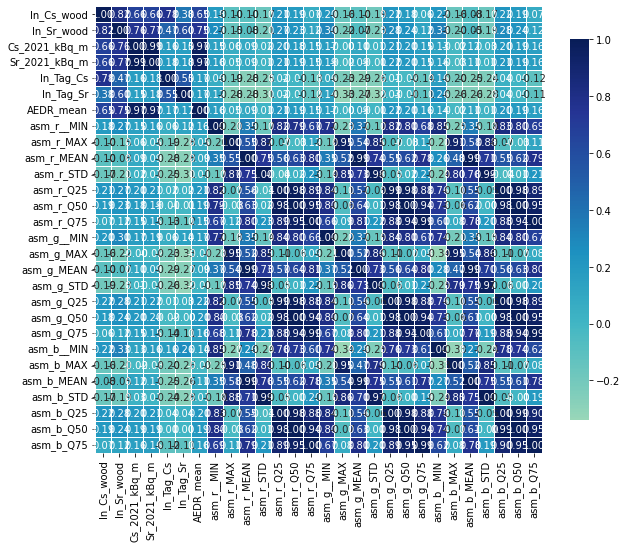

In [7]:
# Correlation matrix

import seaborn as sns # for correlation heatmap

def correlation_heatmap(train):
    correlations = train.corr()

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f', cmap="YlGnBu",
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70}
                )
    plt.show();
    
correlation_heatmap(select)

# Selecting working columns for the XGBoost algorithms

In [8]:
# We select independent variables and predicting parameter 
X = pd.DataFrame(select, columns= [ 'asm_r__MIN', 'asm_r_MAX', 'asm_r_MEAN', 'asm_r_STD', 'asm_r_Q25', 'asm_r_Q50', 'asm_r_Q75', 'asm_g__MIN', 'asm_g_MAX', 'asm_g_MEAN', 'asm_g_STD', 'asm_g_Q25', 'asm_g_Q50', 'asm_g_Q75', 'asm_b__MIN', 'asm_b_MAX', 'asm_b_MEAN', 'asm_b_STD', 'asm_b_Q25', 'asm_b_Q50', 'asm_b_Q75'])
y = pd.DataFrame(select, columns= ['ln_Tag_Cs'])

In [9]:
# Add to 'X' data colection new colomns with sintetic/random data: selest "Yes" or "No".
question=input("Choose an option - Add a synthetic column with random values!!! (Yes or No):")

if question == 'Yes':
    count = y.count()
    norm_random_1 = np.random.normal(10, 2, size=count)
    norm_random_2 = np.random.normal(10, 2, size=count)
    norm_random_3 = np.random.normal(10, 2, size=count)
    norm_random_4 = np.random.normal(10, 2, size=count)
    norm_random_5 = np.random.normal(10, 2, size=count)
    X['Random1'] = norm_random_1
    X['Random2'] = norm_random_2
    X['Random3'] = norm_random_3
    X['Random4'] = norm_random_4
    X['Random5'] = norm_random_5
    
    print('Selected "Yes"!!! A new column with random values was created.')
elif question == 'No':
    print('Selected "No"!!! A new column with random values was not created.')
else:
    print('Error!!! Typed no corectly text!!!')

Choose an option - Add a synthetic column with random values!!! (Yes or No): Yes


Selected "Yes"!!! A new column with random values was created.


In [10]:
# Columns in "X" data collections
X.head()

,asm_r__MIN,asm_r_MAX,asm_r_MEAN,asm_r_STD,asm_r_Q25,asm_r_Q50,asm_r_Q75,asm_g__MIN,asm_g_MAX,asm_g_MEAN,...,asm_b_MEAN,asm_b_STD,asm_b_Q25,asm_b_Q50,asm_b_Q75,Random1,Random2,Random3,Random4,Random5
0,0.004790,0.020304,0.005212,0.000627,0.004988,0.005071,0.005200,0.004783,0.022367,0.005205,...,0.005252,0.000687,0.005010,0.005096,0.005233,9.752163,11.632954,10.387445,8.317191,10.292736
1,0.004805,0.013653,0.005186,0.000564,0.004986,0.005067,0.005194,0.004789,0.014343,0.005171,...,0.005200,0.000537,0.005001,0.005077,0.005205,8.262652,11.960964,9.416264,7.725788,8.610464
2,0.004799,0.007455,0.005114,0.000189,0.004995,0.005072,0.005183,0.004817,0.007534,0.005105,...,0.005142,0.000213,0.005010,0.005091,0.005207,10.683754,12.328373,8.070852,15.170204,9.499328
3,0.004799,0.015074,0.005196,0.000421,0.005013,0.005106,0.005251,0.004790,0.015006,0.005179,...,0.005228,0.000466,0.005024,0.005123,0.005285,9.846432,9.769769,11.099805,6.180214,7.637971
4,0.004798,0.012081,0.005158,0.000366,0.004985,0.005069,0.005206,0.004783,0.012354,0.005138,...,0.005190,0.000428,0.005000,0.005085,0.005226,12.639617,11.542121,11.989170,8.877764,11.552114


In [11]:
# Columns in "y" data collections
y.head()

,ln_Tag_Cs
0,-0.73
1,0.59
2,0.78
3,0.52
4,0.22


# Create first XGBoost model for estimate varibiality of output stats

In [12]:
#  Importing the main library for building model and its analysis
import xgboost as xgb
from scipy.stats import uniform, randint
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score, KFold, RandomizedSearchCV, train_test_split
from sklearn.datasets import make_classification

In [13]:
# K-Folds cross-validation for estimation "quality" of input data for building model
X_kfold = pd.DataFrame(X).to_numpy()
y_kfold = pd.DataFrame(y).to_numpy()

In [14]:
# Function for comparing datasets on homogeneity 
def display_scores(scores):
    print("    Scores: {0}\n    Mean: {1:.3f}\n    Std: {2:.3f}".format(scores, np.mean(scores), np.std(scores)))

In [15]:
# Output results of K-Folds cross-validation for XGBoost model
kfold = KFold(n_splits=3, shuffle=True)
scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(r2_score(y_test, y_pred))
    
print('R square (R2): \n')
display_scores((scores))
print('\n', 20*'-')


scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
      
    scores.append(mean_squared_error(y_test, y_pred))
    
print('Root-mean-square error (RMSE): \n')
display_scores(np.sqrt(scores))
print('\n', 20*'-')

scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(mean_absolute_error(y_test, y_pred))

print('Mean absolute error (MAE): \n')
display_scores((scores))
print('\n', 20*'-')

R square (R2): 

    Scores: [-0.1832986782132704, -1.011999735079507, 0.12716178723999094]
    Mean: -0.356
    Std: 0.481

 --------------------
Root-mean-square error (RMSE): 

    Scores: [1.2695586  1.27172293 1.2980249 ]
    Mean: 1.280
    Std: 0.013

 --------------------
Mean absolute error (MAE): 

    Scores: [1.014038314860846, 0.9045539376249208, 1.1289136415281718]
    Mean: 1.016
    Std: 0.092

 --------------------


# Find optimal hyperparameters for XGBoost model

In [16]:
# Create function for present of hyperparameters and main scores
def report_best_scores(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            global hps
            hps =  results['params'][candidate]
            print("")

In [17]:
# Tuning XGBoost parameters
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", eval_metric="rmse")
params = {
    "colsample_bytree": uniform(0.05, 0.9),
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.01, 0.3), # default 0.1 
    "max_depth": randint(2, 5), # default 3
    "n_estimators": randint(50, 200), # default 100
    "subsample": uniform(0.3, 0.7)
}

search = RandomizedSearchCV(xgb_model, param_distributions=params, n_iter=10, cv=5, verbose=1, n_jobs=1, return_train_score=True)

search.fit(X, y)

report_best_scores(search.cv_results_, 1)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Model with rank: 1
Mean validation score: -0.448 (std: 0.590)
Parameters: {'colsample_bytree': 0.3530479861657272, 'gamma': 0.30106730277352706, 'learning_rate': 0.0631581204420013, 'max_depth': 3, 'n_estimators': 115, 'subsample': 0.4886557355157902}



In [18]:
# All output data for XGBoost models after tuning parameters
print(search.cv_results_)

{'mean_fit_time': array([0.41021647, 0.35058007, 0.38623738, 0.33517032, 0.55712538,
       0.39074531, 0.52944322, 0.56654606, 0.41830029, 0.56684537]), 'std_fit_time': array([0.05672309, 0.10588512, 0.00841743, 0.02982272, 0.04574449,
       0.01648711, 0.00930418, 0.00843131, 0.05878174, 0.0252843 ]), 'mean_score_time': array([0.00797157, 0.00638714, 0.00636106, 0.00786352, 0.00674105,
       0.00646815, 0.00673923, 0.00699406, 0.0069068 , 0.00698748]), 'std_score_time': array([3.22435071e-03, 1.47182693e-04, 1.74969377e-04, 1.32448907e-03,
       3.12594781e-04, 1.05319890e-04, 7.81842248e-05, 2.23367566e-04,
       1.18094900e-04, 1.14088868e-04]), 'param_colsample_bytree': masked_array(data=[0.31873643748951996, 0.3530479861657272,
                   0.8858888029937807, 0.2274328652763834,
                   0.9076718525197235, 0.6515496125697937,
                   0.44915185207827224, 0.7004560043009838,
                   0.5162208527593143, 0.6170161661180222],
             m

In [19]:
# Overwrite hyperparameters data for the next step/stage
p1 = hps['colsample_bytree']     # colsample_bytree
print('Colsample_bytree: ' + str(p1))

p2 = hps['gamma']                # gamma
print('Gamma: ' + str(p2))

p3 = hps['learning_rate']        # learning_rate
print('Learning_rate: ' + str(p3))

p4 = hps['max_depth']            # max_depth
print('Max_depth: ' + str(p4))

p5 = hps['n_estimators']         # n_estimators
print('N_estimators: ' + str(p5))

p6 = hps['subsample']            # subsample
print('Subsample: ' + str(p6))

Colsample_bytree: 0.3530479861657272
Gamma: 0.30106730277352706
Learning_rate: 0.0631581204420013
Max_depth: 3
N_estimators: 115
Subsample: 0.4886557355157902


# Estimation of a basic XGBoost model using Loops

In [20]:
# Create DMatrix (is an internal data structure) 
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [21]:
# Aggregate parameters
aggr_optimal_n=[]
aggr_bias=[]
aggr_rel_bias=[]
aggr_rmse=[]
aggr_rel_rmse=[]
aggr_mse=[]
aggr_R_square=[]

# Body loop
for i in range(30):
    
    # Generate test and training samples
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    # Implementation of the scikit-learn API for XGBoost regression
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])
    
    # Fitting the model 
    xgb_model.fit(X_train, y_train, early_stopping_rounds=20, eval_set=[(X_train, y_train), (X_test, y_test)])
    
    # learning dynamics
    y_pred = xgb_model.predict(X_test, ntree_limit=xgb_model.best_ntree_limit)
    
    # Iteration with the best result
    optimal_n= xgb_model.best_ntree_limit-1
    
    # Convert data to 'array' type
    conv_y_pred = pd.DataFrame(y_pred) # Double transformation
    y_pred2 = conv_y_pred.values
    y_test2 = y_test.values
    
    # Intermediate results
    n_sample = len(y_pred2)
    y_mean_sample = y_test.sum() / n_sample
    
    # Calculation of bias
    diff = y_pred2 - y_test2
    bias = diff.sum()
    rel_bias = bias/y_mean_sample
    
    # Calculation of RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rel_rmse = rmse/y_mean_sample    
        
    # Calculation of MSE
    mse = mean_squared_error(y_test, y_pred)   
    
    # Calculation of Square R
    R_square = r2_score(y_test, y_pred)
    
    #Add values to lists    
    aggr_optimal_n.append(optimal_n)
    aggr_bias.append(bias)
    aggr_rel_bias.append(rel_bias)
    aggr_rmse.append(rmse)
    aggr_rel_rmse.append(rel_rmse)
    aggr_mse.append(mse)
    aggr_R_square.append(R_square)

[0]	validation_0-rmse:1.32508	validation_1-rmse:1.19652
[1]	validation_0-rmse:1.27904	validation_1-rmse:1.19292


/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[2]	validation_0-rmse:1.24142	validation_1-rmse:1.17331
[3]	validation_0-rmse:1.21343	validation_1-rmse:1.15546
[4]	validation_0-rmse:1.17363	validation_1-rmse:1.15538
[5]	validation_0-rmse:1.14659	validation_1-rmse:1.14144
[6]	validation_0-rmse:1.11459	validation_1-rmse:1.13855
[7]	validation_0-rmse:1.08119	validation_1-rmse:1.12260
[8]	validation_0-rmse:1.04431	validation_1-rmse:1.10544
[9]	validation_0-rmse:1.01476	validation_1-rmse:1.10055
[10]	validation_0-rmse:0.98912	validation_1-rmse:1.08215
[11]	validation_0-rmse:0.96890	validation_1-rmse:1.07931
[12]	validation_0-rmse:0.94416	validation_1-rmse:1.07155
[13]	validation_0-rmse:0.91979	validation_1-rmse:1.05844
[14]	validation_0-rmse:0.89849	validation_1-rmse:1.04928
[15]	validation_0-rmse:0.87866	validation_1-rmse:1.03629
[16]	validation_0-rmse:0.86298	validation_1-rmse:1.03698
[17]	validation_0-rmse:0.84902	validation_1-rmse:1.03461
[18]	validation_0-rmse:0.83960	validation_1-rmse:1.02586
[19]	validation_0-rmse:0.82279	validati

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-rmse:1.15350	validation_1-rmse:1.19501
[5]	validation_0-rmse:1.12135	validation_1-rmse:1.17568
[6]	validation_0-rmse:1.08907	validation_1-rmse:1.17071
[7]	validation_0-rmse:1.06712	validation_1-rmse:1.16666
[8]	validation_0-rmse:1.03876	validation_1-rmse:1.14630
[9]	validation_0-rmse:1.01507	validation_1-rmse:1.14712
[10]	validation_0-rmse:0.99883	validation_1-rmse:1.15002
[11]	validation_0-rmse:0.97869	validation_1-rmse:1.13173
[12]	validation_0-rmse:0.96464	validation_1-rmse:1.10961
[13]	validation_0-rmse:0.94432	validation_1-rmse:1.10537
[14]	validation_0-rmse:0.92405	validation_1-rmse:1.09864
[15]	validation_0-rmse:0.90306	validation_1-rmse:1.10811
[16]	validation_0-rmse:0.88478	validation_1-rmse:1.10199
[17]	validation_0-rmse:0.87160	validation_1-rmse:1.10871
[18]	validation_0-rmse:0.85419	validation_1-rmse:1.09661
[19]	validation_0-rmse:0.83501	validation_1-rmse:1.10637
[20]	validation_0-rmse:0.81952	validation_1-rmse:1.10542
[21]	validation_0-rmse:0.80436	valida

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-rmse:1.13107	validation_1-rmse:1.22821
[6]	validation_0-rmse:1.11504	validation_1-rmse:1.22566
[7]	validation_0-rmse:1.08074	validation_1-rmse:1.19645
[8]	validation_0-rmse:1.05058	validation_1-rmse:1.17441
[9]	validation_0-rmse:1.02082	validation_1-rmse:1.14490
[10]	validation_0-rmse:0.99766	validation_1-rmse:1.12836
[11]	validation_0-rmse:0.98215	validation_1-rmse:1.12601
[12]	validation_0-rmse:0.96587	validation_1-rmse:1.12152
[13]	validation_0-rmse:0.94490	validation_1-rmse:1.10143
[14]	validation_0-rmse:0.92292	validation_1-rmse:1.07510
[15]	validation_0-rmse:0.90734	validation_1-rmse:1.07781
[16]	validation_0-rmse:0.89569	validation_1-rmse:1.05877
[17]	validation_0-rmse:0.87237	validation_1-rmse:1.04172
[18]	validation_0-rmse:0.86570	validation_1-rmse:1.04475
[19]	validation_0-rmse:0.84849	validation_1-rmse:1.03730
[20]	validation_0-rmse:0.83669	validation_1-rmse:1.03638
[21]	validation_0-rmse:0.82273	validation_1-rmse:1.02919
[22]	validation_0-rmse:0.81079	valid

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[3]	validation_0-rmse:1.15732	validation_1-rmse:1.45084
[4]	validation_0-rmse:1.11487	validation_1-rmse:1.42613
[5]	validation_0-rmse:1.08375	validation_1-rmse:1.42239
[6]	validation_0-rmse:1.06074	validation_1-rmse:1.42981
[7]	validation_0-rmse:1.03130	validation_1-rmse:1.40250
[8]	validation_0-rmse:1.01279	validation_1-rmse:1.37875
[9]	validation_0-rmse:0.98814	validation_1-rmse:1.36407
[10]	validation_0-rmse:0.96826	validation_1-rmse:1.35973
[11]	validation_0-rmse:0.96234	validation_1-rmse:1.35669
[12]	validation_0-rmse:0.93662	validation_1-rmse:1.32341
[13]	validation_0-rmse:0.91362	validation_1-rmse:1.31317
[14]	validation_0-rmse:0.89614	validation_1-rmse:1.30859
[15]	validation_0-rmse:0.88276	validation_1-rmse:1.27137
[16]	validation_0-rmse:0.86645	validation_1-rmse:1.26583
[17]	validation_0-rmse:0.84969	validation_1-rmse:1.25915
[18]	validation_0-rmse:0.83940	validation_1-rmse:1.25709
[19]	validation_0-rmse:0.82036	validation_1-rmse:1.25189
[20]	validation_0-rmse:0.80752	validat

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-rmse:1.17153	validation_1-rmse:1.06657
[6]	validation_0-rmse:1.15153	validation_1-rmse:1.04809
[7]	validation_0-rmse:1.12141	validation_1-rmse:1.04362
[8]	validation_0-rmse:1.09913	validation_1-rmse:1.03227
[9]	validation_0-rmse:1.07045	validation_1-rmse:1.00393
[10]	validation_0-rmse:1.04358	validation_1-rmse:0.99992
[11]	validation_0-rmse:1.02032	validation_1-rmse:0.98872
[12]	validation_0-rmse:0.99379	validation_1-rmse:0.98566
[13]	validation_0-rmse:0.97023	validation_1-rmse:0.98333
[14]	validation_0-rmse:0.94564	validation_1-rmse:0.97686
[15]	validation_0-rmse:0.93188	validation_1-rmse:0.96512
[16]	validation_0-rmse:0.91456	validation_1-rmse:0.95582
[17]	validation_0-rmse:0.90113	validation_1-rmse:0.95131
[18]	validation_0-rmse:0.89085	validation_1-rmse:0.94814
[19]	validation_0-rmse:0.87090	validation_1-rmse:0.93705
[20]	validation_0-rmse:0.85872	validation_1-rmse:0.93932
[21]	validation_0-rmse:0.84395	validation_1-rmse:0.95170
[22]	validation_0-rmse:0.82047	valid

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-rmse:1.15951	validation_1-rmse:1.05394
[6]	validation_0-rmse:1.12764	validation_1-rmse:1.03710
[7]	validation_0-rmse:1.09454	validation_1-rmse:1.02037
[8]	validation_0-rmse:1.06128	validation_1-rmse:0.99541
[9]	validation_0-rmse:1.03908	validation_1-rmse:0.99804
[10]	validation_0-rmse:1.02831	validation_1-rmse:0.99346
[11]	validation_0-rmse:1.00969	validation_1-rmse:0.98041
[12]	validation_0-rmse:0.98471	validation_1-rmse:0.95943
[13]	validation_0-rmse:0.96420	validation_1-rmse:0.94890
[14]	validation_0-rmse:0.93963	validation_1-rmse:0.94145
[15]	validation_0-rmse:0.91134	validation_1-rmse:0.92917
[16]	validation_0-rmse:0.89599	validation_1-rmse:0.93037
[17]	validation_0-rmse:0.88289	validation_1-rmse:0.92000
[18]	validation_0-rmse:0.86683	validation_1-rmse:0.91645
[19]	validation_0-rmse:0.85099	validation_1-rmse:0.91326
[20]	validation_0-rmse:0.83463	validation_1-rmse:0.91917
[21]	validation_0-rmse:0.83010	validation_1-rmse:0.91098
[22]	validation_0-rmse:0.81803	valid

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:0.83816	validation_1-rmse:1.05341
[20]	validation_0-rmse:0.82535	validation_1-rmse:1.06227
[21]	validation_0-rmse:0.81639	validation_1-rmse:1.05497
[22]	validation_0-rmse:0.79475	validation_1-rmse:1.05014
[23]	validation_0-rmse:0.78061	validation_1-rmse:1.06223
[24]	validation_0-rmse:0.76688	validation_1-rmse:1.06522
[25]	validation_0-rmse:0.75865	validation_1-rmse:1.06164
[26]	validation_0-rmse:0.74983	validation_1-rmse:1.06115
[27]	validation_0-rmse:0.73978	validation_1-rmse:1.05996
[28]	validation_0-rmse:0.72805	validation_1-rmse:1.06566
[29]	validation_0-rmse:0.71648	validation_1-rmse:1.05799
[30]	validation_0-rmse:0.70782	validation_1-rmse:1.06744
[31]	validation_0-rmse:0.69900	validation_1-rmse:1.06268
[32]	validation_0-rmse:0.68995	validation_1-rmse:1.07586
[33]	validation_0-rmse:0.68521	validation_1-rmse:1.08249
[34]	validation_0-rmse:0.67859	validation_1-rmse:1.08291
[35]	validation_0-rmse:0.66798	validation_1-rmse:1.08594
[36]	validation_0-rmse:0.65911	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-rmse:0.84456	validation_1-rmse:1.39592
[14]	validation_0-rmse:0.82213	validation_1-rmse:1.38372
[15]	validation_0-rmse:0.81102	validation_1-rmse:1.37354
[16]	validation_0-rmse:0.79588	validation_1-rmse:1.38050
[17]	validation_0-rmse:0.77886	validation_1-rmse:1.37142
[18]	validation_0-rmse:0.76604	validation_1-rmse:1.36577
[19]	validation_0-rmse:0.74957	validation_1-rmse:1.35447
[20]	validation_0-rmse:0.73785	validation_1-rmse:1.35054
[21]	validation_0-rmse:0.73655	validation_1-rmse:1.35315
[22]	validation_0-rmse:0.72212	validation_1-rmse:1.34977
[23]	validation_0-rmse:0.71111	validation_1-rmse:1.34587
[24]	validation_0-rmse:0.70038	validation_1-rmse:1.35406
[25]	validation_0-rmse:0.69150	validation_1-rmse:1.35012
[26]	validation_0-rmse:0.68071	validation_1-rmse:1.34842
[27]	validation_0-rmse:0.67622	validation_1-rmse:1.34814
[28]	validation_0-rmse:0.66172	validation_1-rmse:1.34671
[29]	validation_0-rmse:0.65257	validation_1-rmse:1.33907
[30]	validation_0-rmse:0.64644	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-rmse:1.20404	validation_1-rmse:1.08467
[5]	validation_0-rmse:1.16806	validation_1-rmse:1.05817
[6]	validation_0-rmse:1.15326	validation_1-rmse:1.04859
[7]	validation_0-rmse:1.12170	validation_1-rmse:1.04059
[8]	validation_0-rmse:1.09533	validation_1-rmse:1.02894
[9]	validation_0-rmse:1.07227	validation_1-rmse:1.01481
[10]	validation_0-rmse:1.05902	validation_1-rmse:0.99892
[11]	validation_0-rmse:1.02771	validation_1-rmse:0.99825
[12]	validation_0-rmse:1.01108	validation_1-rmse:0.97221
[13]	validation_0-rmse:1.00038	validation_1-rmse:0.96179
[14]	validation_0-rmse:0.98220	validation_1-rmse:0.95542
[15]	validation_0-rmse:0.96352	validation_1-rmse:0.96034
[16]	validation_0-rmse:0.94353	validation_1-rmse:0.95217
[17]	validation_0-rmse:0.92409	validation_1-rmse:0.92987
[18]	validation_0-rmse:0.91311	validation_1-rmse:0.93494
[19]	validation_0-rmse:0.89907	validation_1-rmse:0.92513
[20]	validation_0-rmse:0.88329	validation_1-rmse:0.92644
[21]	validation_0-rmse:0.87643	valida

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:0.80817	validation_1-rmse:0.96175
[21]	validation_0-rmse:0.79890	validation_1-rmse:0.95990
[22]	validation_0-rmse:0.78519	validation_1-rmse:0.97145
[23]	validation_0-rmse:0.77455	validation_1-rmse:0.96733
[24]	validation_0-rmse:0.76024	validation_1-rmse:0.97282
[0]	validation_0-rmse:1.28058	validation_1-rmse:1.33670
[1]	validation_0-rmse:1.25237	validation_1-rmse:1.31282
[2]	validation_0-rmse:1.21335	validation_1-rmse:1.26482
[3]	validation_0-rmse:1.18208	validation_1-rmse:1.26268
[4]	validation_0-rmse:1.15357	validation_1-rmse:1.26614
[5]	validation_0-rmse:1.11169	validation_1-rmse:1.23043
[6]	validation_0-rmse:1.07801	validation_1-rmse:1.20382
[7]	validation_0-rmse:1.05736	validation_1-rmse:1.20354
[8]	validation_0-rmse:1.02920	validation_1-rmse:1.17729
[9]	validation_0-rmse:1.01002	validation_1-rmse:1.16440
[10]	validation_0-rmse:0.99158	validation_1-rmse:1.14289
[11]	validation_0-rmse:0.97010	validation_1-rmse:1.12988
[12]	validation_0-rmse:0.95344	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:0.82460	validation_1-rmse:1.09008
[22]	validation_0-rmse:0.80966	validation_1-rmse:1.09688
[23]	validation_0-rmse:0.80378	validation_1-rmse:1.09480
[24]	validation_0-rmse:0.80108	validation_1-rmse:1.10318
[25]	validation_0-rmse:0.79768	validation_1-rmse:1.10529
[26]	validation_0-rmse:0.78940	validation_1-rmse:1.09636
[27]	validation_0-rmse:0.78487	validation_1-rmse:1.08872
[28]	validation_0-rmse:0.76408	validation_1-rmse:1.09177
[29]	validation_0-rmse:0.75557	validation_1-rmse:1.08707
[30]	validation_0-rmse:0.75222	validation_1-rmse:1.08752
[31]	validation_0-rmse:0.73794	validation_1-rmse:1.08680
[32]	validation_0-rmse:0.73382	validation_1-rmse:1.08136
[33]	validation_0-rmse:0.72255	validation_1-rmse:1.08343
[34]	validation_0-rmse:0.71813	validation_1-rmse:1.07750
[35]	validation_0-rmse:0.70685	validation_1-rmse:1.07391
[36]	validation_0-rmse:0.70059	validation_1-rmse:1.07926
[37]	validation_0-rmse:0.69407	validation_1-rmse:1.08532
[38]	validation_0-rmse:0.68089	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:0.87960	validation_1-rmse:0.81537
[20]	validation_0-rmse:0.86421	validation_1-rmse:0.81880
[21]	validation_0-rmse:0.85103	validation_1-rmse:0.80630
[22]	validation_0-rmse:0.84096	validation_1-rmse:0.81760
[23]	validation_0-rmse:0.82852	validation_1-rmse:0.80826
[24]	validation_0-rmse:0.81387	validation_1-rmse:0.81214
[25]	validation_0-rmse:0.79877	validation_1-rmse:0.81057
[26]	validation_0-rmse:0.78964	validation_1-rmse:0.81822
[27]	validation_0-rmse:0.78087	validation_1-rmse:0.83332
[28]	validation_0-rmse:0.76457	validation_1-rmse:0.83775
[29]	validation_0-rmse:0.75529	validation_1-rmse:0.85096
[30]	validation_0-rmse:0.75220	validation_1-rmse:0.83581
[31]	validation_0-rmse:0.74298	validation_1-rmse:0.83664
[32]	validation_0-rmse:0.73336	validation_1-rmse:0.83589
[33]	validation_0-rmse:0.72377	validation_1-rmse:0.84792
[34]	validation_0-rmse:0.71437	validation_1-rmse:0.85894
[35]	validation_0-rmse:0.70334	validation_1-rmse:0.86238
[0]	validation_0-rmse:1.36959	v

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:0.92478	validation_1-rmse:0.75343
[19]	validation_0-rmse:0.90207	validation_1-rmse:0.74191
[20]	validation_0-rmse:0.88127	validation_1-rmse:0.75149
[21]	validation_0-rmse:0.86031	validation_1-rmse:0.74499
[22]	validation_0-rmse:0.84660	validation_1-rmse:0.74199
[23]	validation_0-rmse:0.83266	validation_1-rmse:0.74298
[24]	validation_0-rmse:0.81714	validation_1-rmse:0.73505
[25]	validation_0-rmse:0.80591	validation_1-rmse:0.72917
[26]	validation_0-rmse:0.79602	validation_1-rmse:0.73123
[27]	validation_0-rmse:0.78818	validation_1-rmse:0.73321
[28]	validation_0-rmse:0.77730	validation_1-rmse:0.72937
[29]	validation_0-rmse:0.76802	validation_1-rmse:0.73248
[30]	validation_0-rmse:0.75614	validation_1-rmse:0.73222
[31]	validation_0-rmse:0.74067	validation_1-rmse:0.72419
[32]	validation_0-rmse:0.72895	validation_1-rmse:0.71845
[33]	validation_0-rmse:0.71853	validation_1-rmse:0.71831
[34]	validation_0-rmse:0.71168	validation_1-rmse:0.72360
[35]	validation_0-rmse:0.70103	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:0.92887	validation_1-rmse:0.96647
[15]	validation_0-rmse:0.91299	validation_1-rmse:0.95353
[16]	validation_0-rmse:0.89581	validation_1-rmse:0.94254
[17]	validation_0-rmse:0.88577	validation_1-rmse:0.93346
[18]	validation_0-rmse:0.87711	validation_1-rmse:0.93298
[19]	validation_0-rmse:0.86131	validation_1-rmse:0.92045
[20]	validation_0-rmse:0.84500	validation_1-rmse:0.92030
[21]	validation_0-rmse:0.83461	validation_1-rmse:0.92399
[22]	validation_0-rmse:0.81979	validation_1-rmse:0.92562
[23]	validation_0-rmse:0.80665	validation_1-rmse:0.92553
[24]	validation_0-rmse:0.79493	validation_1-rmse:0.92105
[25]	validation_0-rmse:0.78969	validation_1-rmse:0.92035
[26]	validation_0-rmse:0.78449	validation_1-rmse:0.92873
[27]	validation_0-rmse:0.77731	validation_1-rmse:0.91683
[28]	validation_0-rmse:0.76956	validation_1-rmse:0.91307
[29]	validation_0-rmse:0.75558	validation_1-rmse:0.91568
[30]	validation_0-rmse:0.74814	validation_1-rmse:0.91966
[31]	validation_0-rmse:0.73808	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[8]	validation_0-rmse:1.03355	validation_1-rmse:1.16044
[9]	validation_0-rmse:1.01574	validation_1-rmse:1.16899
[10]	validation_0-rmse:0.98995	validation_1-rmse:1.17084
[11]	validation_0-rmse:0.96167	validation_1-rmse:1.16447
[12]	validation_0-rmse:0.94415	validation_1-rmse:1.16202
[13]	validation_0-rmse:0.92817	validation_1-rmse:1.16461
[14]	validation_0-rmse:0.90928	validation_1-rmse:1.14870
[15]	validation_0-rmse:0.89329	validation_1-rmse:1.15296
[16]	validation_0-rmse:0.87446	validation_1-rmse:1.15259
[17]	validation_0-rmse:0.85274	validation_1-rmse:1.14117
[18]	validation_0-rmse:0.83062	validation_1-rmse:1.14896
[19]	validation_0-rmse:0.81611	validation_1-rmse:1.15951
[20]	validation_0-rmse:0.79848	validation_1-rmse:1.15391
[21]	validation_0-rmse:0.78816	validation_1-rmse:1.15657
[22]	validation_0-rmse:0.77164	validation_1-rmse:1.15857
[23]	validation_0-rmse:0.76252	validation_1-rmse:1.16335
[24]	validation_0-rmse:0.74396	validation_1-rmse:1.16954
[25]	validation_0-rmse:0.73141	va

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:0.91283	validation_1-rmse:0.80600
[16]	validation_0-rmse:0.89323	validation_1-rmse:0.79615
[17]	validation_0-rmse:0.87460	validation_1-rmse:0.78924
[18]	validation_0-rmse:0.86094	validation_1-rmse:0.79709
[19]	validation_0-rmse:0.84905	validation_1-rmse:0.80246
[20]	validation_0-rmse:0.84108	validation_1-rmse:0.79779
[21]	validation_0-rmse:0.83196	validation_1-rmse:0.77581
[22]	validation_0-rmse:0.81308	validation_1-rmse:0.76601
[23]	validation_0-rmse:0.80432	validation_1-rmse:0.77017
[24]	validation_0-rmse:0.78820	validation_1-rmse:0.78983
[25]	validation_0-rmse:0.78012	validation_1-rmse:0.78640
[26]	validation_0-rmse:0.77149	validation_1-rmse:0.78781
[27]	validation_0-rmse:0.75733	validation_1-rmse:0.79683
[28]	validation_0-rmse:0.74284	validation_1-rmse:0.79887
[29]	validation_0-rmse:0.73356	validation_1-rmse:0.80293
[30]	validation_0-rmse:0.72032	validation_1-rmse:0.81648
[31]	validation_0-rmse:0.70664	validation_1-rmse:0.80506
[32]	validation_0-rmse:0.70266	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:0.84807	validation_1-rmse:0.89566
[18]	validation_0-rmse:0.82961	validation_1-rmse:0.89676
[19]	validation_0-rmse:0.82332	validation_1-rmse:0.90255
[20]	validation_0-rmse:0.80911	validation_1-rmse:0.91326
[21]	validation_0-rmse:0.79651	validation_1-rmse:0.92228
[22]	validation_0-rmse:0.77695	validation_1-rmse:0.92184
[23]	validation_0-rmse:0.76571	validation_1-rmse:0.93722
[24]	validation_0-rmse:0.75233	validation_1-rmse:0.93483
[25]	validation_0-rmse:0.74587	validation_1-rmse:0.93735
[26]	validation_0-rmse:0.73608	validation_1-rmse:0.93961
[27]	validation_0-rmse:0.72870	validation_1-rmse:0.94059
[28]	validation_0-rmse:0.72077	validation_1-rmse:0.94182
[29]	validation_0-rmse:0.71091	validation_1-rmse:0.93410
[30]	validation_0-rmse:0.69356	validation_1-rmse:0.93861
[31]	validation_0-rmse:0.67703	validation_1-rmse:0.93580
[32]	validation_0-rmse:0.67439	validation_1-rmse:0.93590
[33]	validation_0-rmse:0.66768	validation_1-rmse:0.93270
[34]	validation_0-rmse:0.66037	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-rmse:0.92291	validation_1-rmse:1.02368
[14]	validation_0-rmse:0.90163	validation_1-rmse:0.99070
[15]	validation_0-rmse:0.88678	validation_1-rmse:0.98730
[16]	validation_0-rmse:0.86771	validation_1-rmse:0.98127
[17]	validation_0-rmse:0.85766	validation_1-rmse:0.97523
[18]	validation_0-rmse:0.84430	validation_1-rmse:0.96734
[19]	validation_0-rmse:0.82728	validation_1-rmse:0.96885
[20]	validation_0-rmse:0.81113	validation_1-rmse:0.96335
[21]	validation_0-rmse:0.79883	validation_1-rmse:0.96977
[22]	validation_0-rmse:0.79309	validation_1-rmse:0.96210
[23]	validation_0-rmse:0.78043	validation_1-rmse:0.96146
[24]	validation_0-rmse:0.77027	validation_1-rmse:0.95811
[25]	validation_0-rmse:0.75701	validation_1-rmse:0.95445
[26]	validation_0-rmse:0.74632	validation_1-rmse:0.95663
[27]	validation_0-rmse:0.74111	validation_1-rmse:0.95310
[28]	validation_0-rmse:0.73326	validation_1-rmse:0.95350
[29]	validation_0-rmse:0.72455	validation_1-rmse:0.95856
[30]	validation_0-rmse:0.71603	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:0.83698	validation_1-rmse:1.26742
[17]	validation_0-rmse:0.82355	validation_1-rmse:1.27159
[18]	validation_0-rmse:0.81004	validation_1-rmse:1.25741
[19]	validation_0-rmse:0.79398	validation_1-rmse:1.24802
[20]	validation_0-rmse:0.77197	validation_1-rmse:1.23377
[21]	validation_0-rmse:0.77191	validation_1-rmse:1.23982
[22]	validation_0-rmse:0.75820	validation_1-rmse:1.23439
[23]	validation_0-rmse:0.74406	validation_1-rmse:1.22641
[24]	validation_0-rmse:0.73264	validation_1-rmse:1.22519
[25]	validation_0-rmse:0.72088	validation_1-rmse:1.20859
[26]	validation_0-rmse:0.70804	validation_1-rmse:1.21235
[27]	validation_0-rmse:0.69763	validation_1-rmse:1.21254
[28]	validation_0-rmse:0.68622	validation_1-rmse:1.19791
[29]	validation_0-rmse:0.67592	validation_1-rmse:1.19716
[30]	validation_0-rmse:0.66201	validation_1-rmse:1.18945
[31]	validation_0-rmse:0.65211	validation_1-rmse:1.18308
[32]	validation_0-rmse:0.64413	validation_1-rmse:1.18471
[33]	validation_0-rmse:0.63448	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[3]	validation_0-rmse:1.22594	validation_1-rmse:0.91865
[4]	validation_0-rmse:1.19971	validation_1-rmse:0.90646
[5]	validation_0-rmse:1.17232	validation_1-rmse:0.87280
[6]	validation_0-rmse:1.15003	validation_1-rmse:0.85506
[7]	validation_0-rmse:1.11383	validation_1-rmse:0.84712
[8]	validation_0-rmse:1.09477	validation_1-rmse:0.84968
[9]	validation_0-rmse:1.07883	validation_1-rmse:0.85750
[10]	validation_0-rmse:1.05817	validation_1-rmse:0.83566
[11]	validation_0-rmse:1.03385	validation_1-rmse:0.81698
[12]	validation_0-rmse:1.00429	validation_1-rmse:0.82374
[13]	validation_0-rmse:0.98802	validation_1-rmse:0.81522
[14]	validation_0-rmse:0.97289	validation_1-rmse:0.80588
[15]	validation_0-rmse:0.94981	validation_1-rmse:0.79461
[16]	validation_0-rmse:0.93090	validation_1-rmse:0.78913
[17]	validation_0-rmse:0.91417	validation_1-rmse:0.78752
[18]	validation_0-rmse:0.89569	validation_1-rmse:0.78151
[19]	validation_0-rmse:0.87544	validation_1-rmse:0.77950
[20]	validation_0-rmse:0.86053	validat

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:0.86609	validation_1-rmse:1.05335
[17]	validation_0-rmse:0.85870	validation_1-rmse:1.05958
[18]	validation_0-rmse:0.84445	validation_1-rmse:1.05603
[19]	validation_0-rmse:0.82894	validation_1-rmse:1.04380
[20]	validation_0-rmse:0.81608	validation_1-rmse:1.02710
[21]	validation_0-rmse:0.80840	validation_1-rmse:1.02602
[22]	validation_0-rmse:0.79528	validation_1-rmse:1.01822
[23]	validation_0-rmse:0.78696	validation_1-rmse:1.01075
[24]	validation_0-rmse:0.77493	validation_1-rmse:1.01186
[25]	validation_0-rmse:0.76953	validation_1-rmse:1.01585
[26]	validation_0-rmse:0.75968	validation_1-rmse:1.01787
[27]	validation_0-rmse:0.75342	validation_1-rmse:1.01221
[28]	validation_0-rmse:0.74443	validation_1-rmse:1.02284
[29]	validation_0-rmse:0.73927	validation_1-rmse:1.01489
[30]	validation_0-rmse:0.73301	validation_1-rmse:1.02366
[31]	validation_0-rmse:0.72037	validation_1-rmse:1.01628
[32]	validation_0-rmse:0.71001	validation_1-rmse:1.01338
[33]	validation_0-rmse:0.70309	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-rmse:1.11216	validation_1-rmse:1.21873
[5]	validation_0-rmse:1.07722	validation_1-rmse:1.20887
[6]	validation_0-rmse:1.05809	validation_1-rmse:1.19943
[7]	validation_0-rmse:1.02353	validation_1-rmse:1.17821
[8]	validation_0-rmse:0.99321	validation_1-rmse:1.16906
[9]	validation_0-rmse:0.96115	validation_1-rmse:1.17037
[10]	validation_0-rmse:0.94468	validation_1-rmse:1.17190
[11]	validation_0-rmse:0.92862	validation_1-rmse:1.15236
[12]	validation_0-rmse:0.90272	validation_1-rmse:1.14454
[13]	validation_0-rmse:0.88229	validation_1-rmse:1.15150
[14]	validation_0-rmse:0.85914	validation_1-rmse:1.13798
[15]	validation_0-rmse:0.85053	validation_1-rmse:1.13440
[16]	validation_0-rmse:0.83269	validation_1-rmse:1.13312
[17]	validation_0-rmse:0.80614	validation_1-rmse:1.12579
[18]	validation_0-rmse:0.79235	validation_1-rmse:1.12944
[19]	validation_0-rmse:0.77813	validation_1-rmse:1.13700
[20]	validation_0-rmse:0.75513	validation_1-rmse:1.13859
[21]	validation_0-rmse:0.74639	valida

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-rmse:1.05252	validation_1-rmse:1.56913
[5]	validation_0-rmse:1.02797	validation_1-rmse:1.54664
[6]	validation_0-rmse:1.01951	validation_1-rmse:1.53466
[7]	validation_0-rmse:0.99687	validation_1-rmse:1.51047
[8]	validation_0-rmse:0.96606	validation_1-rmse:1.49165
[9]	validation_0-rmse:0.94910	validation_1-rmse:1.48360
[10]	validation_0-rmse:0.92947	validation_1-rmse:1.47109
[11]	validation_0-rmse:0.91034	validation_1-rmse:1.44740
[12]	validation_0-rmse:0.89761	validation_1-rmse:1.43206
[13]	validation_0-rmse:0.88284	validation_1-rmse:1.42518
[14]	validation_0-rmse:0.86379	validation_1-rmse:1.39972
[15]	validation_0-rmse:0.85593	validation_1-rmse:1.39774
[16]	validation_0-rmse:0.84901	validation_1-rmse:1.38765
[17]	validation_0-rmse:0.82796	validation_1-rmse:1.36653
[18]	validation_0-rmse:0.82048	validation_1-rmse:1.35830
[19]	validation_0-rmse:0.80697	validation_1-rmse:1.34850
[20]	validation_0-rmse:0.79915	validation_1-rmse:1.33895
[21]	validation_0-rmse:0.78305	valida

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:0.83234	validation_1-rmse:1.28207
[17]	validation_0-rmse:0.82552	validation_1-rmse:1.27665
[18]	validation_0-rmse:0.81583	validation_1-rmse:1.26873
[19]	validation_0-rmse:0.80732	validation_1-rmse:1.26575
[20]	validation_0-rmse:0.79650	validation_1-rmse:1.26547
[21]	validation_0-rmse:0.78622	validation_1-rmse:1.25323
[22]	validation_0-rmse:0.78557	validation_1-rmse:1.25327
[23]	validation_0-rmse:0.77348	validation_1-rmse:1.26055
[24]	validation_0-rmse:0.76442	validation_1-rmse:1.24709
[25]	validation_0-rmse:0.75578	validation_1-rmse:1.25809
[26]	validation_0-rmse:0.74484	validation_1-rmse:1.25099
[27]	validation_0-rmse:0.73020	validation_1-rmse:1.24667
[28]	validation_0-rmse:0.72055	validation_1-rmse:1.24230
[29]	validation_0-rmse:0.70980	validation_1-rmse:1.24480
[30]	validation_0-rmse:0.69691	validation_1-rmse:1.23267
[31]	validation_0-rmse:0.68855	validation_1-rmse:1.23375
[32]	validation_0-rmse:0.67841	validation_1-rmse:1.23973
[33]	validation_0-rmse:0.67300	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-rmse:0.96343	validation_1-rmse:0.81432
[13]	validation_0-rmse:0.94329	validation_1-rmse:0.81778
[14]	validation_0-rmse:0.91559	validation_1-rmse:0.83083
[15]	validation_0-rmse:0.90453	validation_1-rmse:0.83853
[16]	validation_0-rmse:0.89633	validation_1-rmse:0.84126
[17]	validation_0-rmse:0.87388	validation_1-rmse:0.84301
[18]	validation_0-rmse:0.86192	validation_1-rmse:0.84420
[19]	validation_0-rmse:0.84125	validation_1-rmse:0.86904
[20]	validation_0-rmse:0.82366	validation_1-rmse:0.87013
[21]	validation_0-rmse:0.81563	validation_1-rmse:0.87078
[22]	validation_0-rmse:0.80315	validation_1-rmse:0.86826
[23]	validation_0-rmse:0.78794	validation_1-rmse:0.87617
[24]	validation_0-rmse:0.78070	validation_1-rmse:0.87880
[25]	validation_0-rmse:0.77372	validation_1-rmse:0.87129
[26]	validation_0-rmse:0.77063	validation_1-rmse:0.86985
[27]	validation_0-rmse:0.76763	validation_1-rmse:0.87630
[28]	validation_0-rmse:0.75134	validation_1-rmse:0.88310
[0]	validation_0-rmse:1.29842	v

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:0.86875	validation_1-rmse:1.13193
[18]	validation_0-rmse:0.85572	validation_1-rmse:1.12400
[19]	validation_0-rmse:0.84099	validation_1-rmse:1.13205
[20]	validation_0-rmse:0.83026	validation_1-rmse:1.12535
[21]	validation_0-rmse:0.82063	validation_1-rmse:1.13288
[22]	validation_0-rmse:0.80460	validation_1-rmse:1.11832
[23]	validation_0-rmse:0.78596	validation_1-rmse:1.12660
[24]	validation_0-rmse:0.77730	validation_1-rmse:1.11536
[25]	validation_0-rmse:0.77091	validation_1-rmse:1.11799
[26]	validation_0-rmse:0.76025	validation_1-rmse:1.11575
[27]	validation_0-rmse:0.74258	validation_1-rmse:1.11876
[28]	validation_0-rmse:0.73222	validation_1-rmse:1.11820
[29]	validation_0-rmse:0.71794	validation_1-rmse:1.10810
[30]	validation_0-rmse:0.70614	validation_1-rmse:1.10272
[31]	validation_0-rmse:0.69212	validation_1-rmse:1.09563
[32]	validation_0-rmse:0.68776	validation_1-rmse:1.08460
[33]	validation_0-rmse:0.67980	validation_1-rmse:1.08721
[34]	validation_0-rmse:0.66848	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:0.83858	validation_1-rmse:1.13490
[20]	validation_0-rmse:0.82327	validation_1-rmse:1.13971
[21]	validation_0-rmse:0.81201	validation_1-rmse:1.13642
[22]	validation_0-rmse:0.80323	validation_1-rmse:1.12134
[23]	validation_0-rmse:0.79255	validation_1-rmse:1.12171
[24]	validation_0-rmse:0.78294	validation_1-rmse:1.13536
[25]	validation_0-rmse:0.77640	validation_1-rmse:1.12101
[26]	validation_0-rmse:0.76820	validation_1-rmse:1.11948
[27]	validation_0-rmse:0.75858	validation_1-rmse:1.14656
[28]	validation_0-rmse:0.74272	validation_1-rmse:1.16033
[29]	validation_0-rmse:0.73491	validation_1-rmse:1.17307
[30]	validation_0-rmse:0.73313	validation_1-rmse:1.17152
[31]	validation_0-rmse:0.72531	validation_1-rmse:1.16378
[32]	validation_0-rmse:0.71282	validation_1-rmse:1.17770
[33]	validation_0-rmse:0.70616	validation_1-rmse:1.18406
[34]	validation_0-rmse:0.69754	validation_1-rmse:1.18704
[35]	validation_0-rmse:0.68653	validation_1-rmse:1.19117
[36]	validation_0-rmse:0.67848	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:0.87848	validation_1-rmse:1.12486
[18]	validation_0-rmse:0.86157	validation_1-rmse:1.12641
[19]	validation_0-rmse:0.84586	validation_1-rmse:1.10844
[20]	validation_0-rmse:0.84117	validation_1-rmse:1.11387
[21]	validation_0-rmse:0.82842	validation_1-rmse:1.10100
[22]	validation_0-rmse:0.81691	validation_1-rmse:1.10130
[23]	validation_0-rmse:0.80981	validation_1-rmse:1.09173
[24]	validation_0-rmse:0.80025	validation_1-rmse:1.09291
[25]	validation_0-rmse:0.79068	validation_1-rmse:1.09683
[26]	validation_0-rmse:0.78127	validation_1-rmse:1.08997
[27]	validation_0-rmse:0.76846	validation_1-rmse:1.08700
[28]	validation_0-rmse:0.75367	validation_1-rmse:1.07943
[29]	validation_0-rmse:0.74293	validation_1-rmse:1.08419
[30]	validation_0-rmse:0.73652	validation_1-rmse:1.08812
[31]	validation_0-rmse:0.72699	validation_1-rmse:1.08542
[32]	validation_0-rmse:0.71286	validation_1-rmse:1.09434
[33]	validation_0-rmse:0.70866	validation_1-rmse:1.10137
[34]	validation_0-rmse:0.70006	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:0.84799	validation_1-rmse:1.08851
[19]	validation_0-rmse:0.83348	validation_1-rmse:1.08074
[20]	validation_0-rmse:0.81997	validation_1-rmse:1.08414
[21]	validation_0-rmse:0.80758	validation_1-rmse:1.07171
[22]	validation_0-rmse:0.79814	validation_1-rmse:1.06909
[23]	validation_0-rmse:0.78401	validation_1-rmse:1.06289
[24]	validation_0-rmse:0.77603	validation_1-rmse:1.05990
[25]	validation_0-rmse:0.76098	validation_1-rmse:1.05382
[26]	validation_0-rmse:0.74991	validation_1-rmse:1.05894
[27]	validation_0-rmse:0.73168	validation_1-rmse:1.05814
[28]	validation_0-rmse:0.71936	validation_1-rmse:1.05927
[29]	validation_0-rmse:0.70879	validation_1-rmse:1.05322
[30]	validation_0-rmse:0.69795	validation_1-rmse:1.05581
[31]	validation_0-rmse:0.68778	validation_1-rmse:1.05604
[32]	validation_0-rmse:0.68259	validation_1-rmse:1.06557
[33]	validation_0-rmse:0.67684	validation_1-rmse:1.06755
[34]	validation_0-rmse:0.67122	validation_1-rmse:1.06627
[35]	validation_0-rmse:0.66372	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:0.83728	validation_1-rmse:1.21046
[18]	validation_0-rmse:0.83177	validation_1-rmse:1.20772
[19]	validation_0-rmse:0.82312	validation_1-rmse:1.19127
[20]	validation_0-rmse:0.81956	validation_1-rmse:1.19412
[21]	validation_0-rmse:0.80747	validation_1-rmse:1.18462
[22]	validation_0-rmse:0.79420	validation_1-rmse:1.16952
[23]	validation_0-rmse:0.78311	validation_1-rmse:1.17972
[24]	validation_0-rmse:0.76895	validation_1-rmse:1.18013
[25]	validation_0-rmse:0.75794	validation_1-rmse:1.17320
[26]	validation_0-rmse:0.74973	validation_1-rmse:1.15868
[27]	validation_0-rmse:0.73488	validation_1-rmse:1.15439
[28]	validation_0-rmse:0.71772	validation_1-rmse:1.15153
[29]	validation_0-rmse:0.71000	validation_1-rmse:1.15759
[30]	validation_0-rmse:0.70057	validation_1-rmse:1.15361
[31]	validation_0-rmse:0.68945	validation_1-rmse:1.15312
[32]	validation_0-rmse:0.68152	validation_1-rmse:1.15608
[33]	validation_0-rmse:0.66856	validation_1-rmse:1.14908
[34]	validation_0-rmse:0.65710	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


In [22]:
# Aggregate stat
# optimal number of iterations
aggr_optimal_n_mean = np.mean(aggr_optimal_n)
aggr_optimal_n_Q025 = np.quantile(aggr_optimal_n, 0.025)
aggr_optimal_n_Q16 = np.quantile(aggr_optimal_n, 0.16)
aggr_optimal_n_Q50 = np.quantile(aggr_optimal_n, 0.50)
aggr_optimal_n_Q84 = np.quantile(aggr_optimal_n, 0.84)
aggr_optimal_n_Q975 = np.quantile(aggr_optimal_n, 0.975)

# bias
aggr_bias_mean = np.mean(aggr_bias)
aggr_bias_Q025 = np.quantile(aggr_bias, 0.025)
aggr_bias_Q16 = np.quantile(aggr_bias, 0.16)
aggr_bias_Q50 = np.quantile(aggr_bias, 0.50)
aggr_bias_Q84 = np.quantile(aggr_bias, 0.84)
aggr_bias_Q975 = np.quantile(aggr_bias, 0.975)

aggr_rel_bias_mean = np.mean(aggr_rel_bias)
aggr_rel_bias_Q025 = np.quantile(aggr_rel_bias, 0.025)
aggr_rel_bias_Q16 = np.quantile(aggr_rel_bias, 0.16)
aggr_rel_bias_Q50 = np.quantile(aggr_rel_bias, 0.50)
aggr_rel_bias_Q84 = np.quantile(aggr_rel_bias, 0.84)
aggr_rel_bias_Q975 = np.quantile(aggr_rel_bias, 0.975)

# RMSE
aggr_rmse_mean = np.mean(aggr_rmse)
aggr_rmse_Q025 = np.quantile(aggr_rmse, 0.025)
aggr_rmse_Q16 = np.quantile(aggr_rmse, 0.16)
aggr_rmse_Q50 = np.quantile(aggr_rmse, 0.50)
aggr_rmse_Q84 = np.quantile(aggr_rmse, 0.84)
aggr_rmse_Q975 = np.quantile(aggr_rmse, 0.975)

aggr_rel_rmse_mean = np.mean(aggr_rel_rmse)
aggr_rel_rmse_Q025 = np.quantile(aggr_rel_rmse, 0.025)
aggr_rel_rmse_Q16 = np.quantile(aggr_rel_rmse, 0.16)
aggr_rel_rmse_Q50 = np.quantile(aggr_rel_rmse, 0.50)
aggr_rel_rmse_Q84 = np.quantile(aggr_rel_rmse, 0.84)
aggr_rel_rmse_Q975 = np.quantile(aggr_rel_rmse, 0.975)

# MSE
aggr_mse_mean = np.mean(aggr_mse)
aggr_mse_Q025 = np.quantile(aggr_mse, 0.025)
aggr_mse_Q16 = np.quantile(aggr_mse, 0.16)
aggr_mse_Q50 = np.quantile(aggr_mse, 0.50)
aggr_mse_Q84 = np.quantile(aggr_mse, 0.84)
aggr_mse_Q975 = np.quantile(aggr_mse, 0.975)

# R-square
aggr_R_square_mean = np.mean(aggr_R_square)
aggr_R_square_Q025 = np.quantile(aggr_R_square, 0.025)
aggr_R_square_Q16 = np.quantile(aggr_R_square, 0.16)
aggr_R_square_Q50 = np.quantile(aggr_R_square, 0.50)
aggr_R_square_Q84 = np.quantile(aggr_R_square, 0.84)
aggr_R_square_Q975 = np.quantile(aggr_R_square, 0.975)

# Intermedia ratio for calculation CI
CIR=2/(n_sample**0.5)

In [23]:
# Output calculated stat
print(f"Aggregate optimal number of iterations statistic: \n mean: {round(aggr_optimal_n_mean, 3)}, median: {round(aggr_optimal_n_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_optimal_n_Q025, 3)}-{round(aggr_optimal_n_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_optimal_n_Q50-((aggr_optimal_n_Q50-aggr_optimal_n_Q16)*CIR), 3)}-{round(aggr_optimal_n_Q50+((aggr_optimal_n_Q84-aggr_optimal_n_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias statistic: \n mean: {round(aggr_bias_mean, 3)}, median: {round(aggr_bias_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_bias_Q025, 3)}-{round(aggr_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_bias_Q50-((aggr_bias_Q50-aggr_bias_Q16)*CIR), 3)}-{round(aggr_bias_Q50+((aggr_bias_Q84-aggr_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE statistic: \n mean: {round(aggr_rmse_mean, 3)}, median: {round(aggr_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rmse_Q025, 3)}-{round(aggr_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rmse_Q50-((aggr_rmse_Q50-aggr_rmse_Q16)*CIR), 3)}-{round(aggr_rmse_Q50+((aggr_rmse_Q84-aggr_rmse_Q50)*CIR), 3)} \n***")
print(f"Aggregate MSE statistic: \n mean: {round(aggr_mse_mean, 3)}, median: {round(aggr_mse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_mse_Q025, 3)}-{round(aggr_mse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_mse_Q50-((aggr_mse_Q50-aggr_mse_Q16)*CIR), 3)}-{round(aggr_mse_Q50+((aggr_mse_Q84-aggr_mse_Q50)*CIR), 3)} \n***")
print(f"Aggregate R^2 statistic: \n mean: {round(aggr_R_square_mean, 3)}, median: {round(aggr_R_square_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_R_square_Q025, 3)}-{round(aggr_R_square_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_R_square_Q50-((aggr_R_square_Q50-aggr_R_square_Q16)*CIR), 3)}-{round(aggr_R_square_Q50+((aggr_R_square_Q84-aggr_R_square_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias(%) statistic: \n mean: {round(aggr_rel_bias_mean, 3)}, median: {round(aggr_bias_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_bias_Q025, 3)}-{round(aggr_rel_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_bias_Q50-((aggr_rel_bias_Q50-aggr_rel_bias_Q16)*CIR), 3)}-{round(aggr_rel_bias_Q50+((aggr_rel_bias_Q84-aggr_rel_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE(%) statistic: \n mean: {round(aggr_rel_rmse_mean, 3)}, median: {round(aggr_rel_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_rmse_Q025, 3)}-{round(aggr_rel_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_rmse_Q50-((aggr_rel_rmse_Q50-aggr_rel_rmse_Q16)*CIR), 3)}-{round(aggr_rel_rmse_Q50+((aggr_rel_rmse_Q84-aggr_rel_rmse_Q50)*CIR), 3)} \n***")

Aggregate optimal number of iterations statistic: 
 mean: 31.9, median: 30.5,
 pred. interval (P(0.025)-P(0.975)): 6.9-63.825, 
 conf. interval (p-value=0.95): 25.167-36.898 
***
Aggregate bias statistic: 
 mean: 2.885, median: 2.262,
 pred. interval (P(0.025)-P(0.975)): -2.176-11.131, 
 conf. interval (p-value=0.95): 0.95-3.811 
***
Aggregate RMSE statistic: 
 mean: 1.002, median: 1.028, pred. interval (P(0.025)-P(0.975)): 0.753-1.228, 
 conf. interval (p-value=0.95): 0.943-1.084 
***
Aggregate MSE statistic: 
 mean: 1.026, median: 1.057, pred. interval (P(0.025)-P(0.975)): 0.567-1.508, 
 conf. interval (p-value=0.95): 0.899-1.179 
***
Aggregate R^2 statistic: 
 mean: 0.072, median: 0.068, pred. interval (P(0.025)-P(0.975)): -0.209-0.323, 
 conf. interval (p-value=0.95): 0.041-0.115 
***
Aggregate bias(%) statistic: 
 mean: 22.499, median: 2.262, pred. interval (P(0.025)-P(0.975)): -25.657-266.128, 
 conf. interval (p-value=0.95): -12.607-2.346 
***
Aggregate RMSE(%) statistic: 
 mean

# ***Training on all data***

# Creating a final XGBoost model

In [24]:
# Generate test and training samples
f_X_train = X
f_y_train = y

In [25]:
# Implementation of the scikit-learn API for XGBoost regression
f_xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])

In [26]:
# Fitting the model 
f_xgb_model.fit(f_X_train, f_y_train, early_stopping_rounds=20, eval_set=[(f_X_train, f_y_train)])
# learning dynamics
f_y_pred = f_xgb_model.predict(f_X_train, ntree_limit=f_xgb_model.best_ntree_limit)

[0]	validation_0-rmse:1.29929
[1]	validation_0-rmse:1.26117
[2]	validation_0-rmse:1.23005
[3]	validation_0-rmse:1.19091
[4]	validation_0-rmse:1.15429


/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-rmse:1.12867
[6]	validation_0-rmse:1.08451
[7]	validation_0-rmse:1.06623
[8]	validation_0-rmse:1.04188
[9]	validation_0-rmse:1.00506
[10]	validation_0-rmse:0.99295
[11]	validation_0-rmse:0.96959
[12]	validation_0-rmse:0.95068
[13]	validation_0-rmse:0.93630
[14]	validation_0-rmse:0.92057
[15]	validation_0-rmse:0.90033
[16]	validation_0-rmse:0.88427
[17]	validation_0-rmse:0.87018
[18]	validation_0-rmse:0.85585
[19]	validation_0-rmse:0.84495
[20]	validation_0-rmse:0.83207
[21]	validation_0-rmse:0.81689
[22]	validation_0-rmse:0.80549
[23]	validation_0-rmse:0.79542
[24]	validation_0-rmse:0.78406
[25]	validation_0-rmse:0.77860
[26]	validation_0-rmse:0.76291
[27]	validation_0-rmse:0.75413
[28]	validation_0-rmse:0.74183
[29]	validation_0-rmse:0.73151
[30]	validation_0-rmse:0.72701
[31]	validation_0-rmse:0.72171
[32]	validation_0-rmse:0.71219
[33]	validation_0-rmse:0.70811
[34]	validation_0-rmse:0.69840
[35]	validation_0-rmse:0.69006
[36]	validation_0-rmse:0.68265
[37]	validati

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


In [27]:
# Iteration with the best result
f_optimal_n = f_xgb_model.best_ntree_limit-1
print("The best iteration: " + str(f_optimal_n))    

The best iteration: 114


In [28]:
# Preparing data for building a learning graph
f_results = f_xgb_model.evals_result()

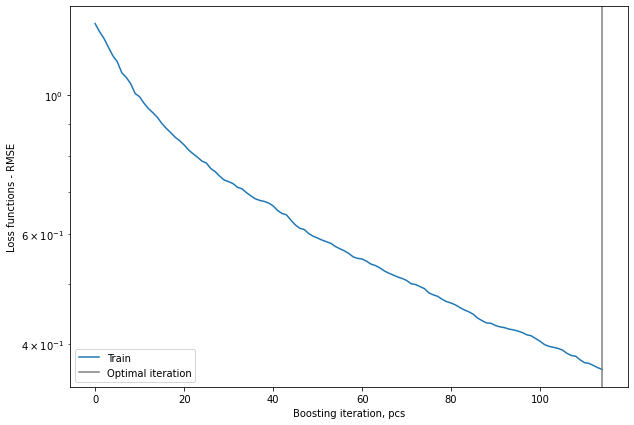

In [29]:
# Learning curves for the XGBoost model 
plt.figure(figsize=(10,7))
plt.yscale("log")
plt.plot(f_results['validation_0']['rmse'], label='Train')
plt.axvline(f_optimal_n, color="gray", label="Optimal iteration")
plt.xlabel("Boosting iteration, pcs")
plt.ylabel("Loss functions - RMSE")
plt.legend()

# Estimation of a final XGBoost model

In [30]:
"""
Assessment of linear approximation between observations and 
predict values and estimation of parameters uncertainties for this regression
"""
# Load libraries elements
from scipy.optimize import curve_fit   
from scipy import stats

# pip install uncertainties, if needed
try:
    import uncertainties.unumpy as unp
    import uncertainties as unc
except:
    try:
        from pip import main as pipmain
    except:
        from pip._internal import main as pipmain
    pipmain(['install','uncertainties'])
    import uncertainties.unumpy as unp
    import uncertainties as unc

In [31]:
# Convert data to 'array' type
f_conv_y_pred = pd.DataFrame(f_y_pred) # Double transformation
f_y_pred2 = f_conv_y_pred.values
f_y_train2 = f_y_train.values

# Intermediate results
f_n_sample = len(f_y_pred2)
f_main_sample = f_y_train.sum() / f_n_sample

# Calculation of bias
f_diff = f_y_pred2 - f_y_train2
f_bias = f_diff.sum()
print('Bias: %.1f' % (f_bias/f_n_sample))
print("Relative bias(%):", " %.2f" % (f_bias/f_main_sample))

# Calculation of RMSE
f_rmse = np.sqrt(mean_squared_error(f_y_train, f_y_pred))
print("RMSE: %.1f" % (f_rmse))
print("Relative RMSE(%):", " %.3f" % (f_rmse/f_main_sample))

# Calculation of MSE
f_mse = mean_squared_error(f_y_train, f_y_pred)
print("MSE: %.1f" % (f_mse))

# Calculation of Square R
f_R_square = r2_score(f_y_train, f_y_pred)
print("R square: %.1f%%" % (f_R_square * 100.0))

Bias: 0.0
Relative bias(%):  -4.49
RMSE: 0.4
Relative RMSE(%):  -1.448
MSE: 0.1
R square: 89.0%


In [32]:
# Convert input data
f_x_train_conv = np.array(f_y_train)
f_x_train_convert = np.array([None]*f_n_sample)
for i in range(f_n_sample):
    f_x_train_convert[i] = float(f_x_train_conv[i])

x_plot = f_x_train_convert
y_plot = f_y_pred
n = len(y_plot)

# Function for fitting a linear curve and estimating its parameters
def f(x_plot, a0, a1):
    return a0 + a1 * x_plot

popt, pcov = curve_fit(f, x_plot, y_plot)

Optimal values of regression parameters
a0: -0.057
a1: 0.729
R^2: 0.936
Uncertainty
a0: -0.057+/-0.021
a1: 0.729+/-0.019


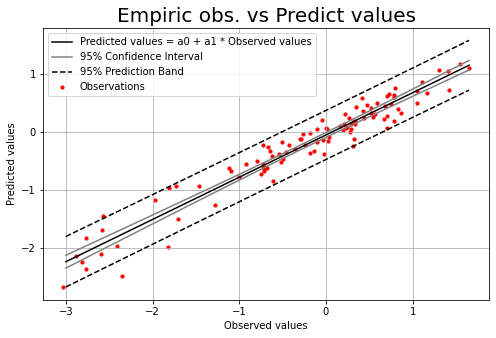

In [33]:
# Building linear a graph and calculation uncertainties
# retrieve parameter values
a0 = popt[0]
a1 = popt[1]
print('Optimal values of regression parameters')
print(f'a0: {a0:.3f}')
print(f'a1: {a1:.3f}')

# compute r^2
r2 = 1.0-(sum((y_plot-f(x_plot, a0, a1)) ** 2)/((n - 1.0)*np.var(y_plot, ddof = 1)))
f_r2 = round(r2, 3)
print(f'R^2: {r2:.3f}')

# calculate parameter confidence interval
a0, a1 = unc.correlated_values(popt, pcov)
print('Uncertainty')
print('a0: ' + str(a0))
print('a1: ' + str(a1))

# plot data
plt.figure(figsize =(8, 5))
plt.scatter(x_plot, y_plot, s = 10, c = 'red', label='Observations', marker = 'o')
plt.yscale('linear')

# estimation uncertenlies intervals
def predband(x_plot, xd, yd, p, func, conf=0.95):
    # x_plot = requested points
    # xd = x data
    # yd = y data
    # p = parameters
    # func = function name
    alpha = 1.0 - conf    # significance
    N = xd.size          # data sample size
    var_n = len(p)  # number of parameters
    # Quantile of Student's t distribution for p=(1-alpha/2)
    q = stats.t.ppf(1.0 - alpha / 2.0, N - var_n)
    # Stdev of an individual measurement
    se = np.sqrt(1. / (N - var_n) * \
                 np.sum((yd - func(xd, *p)) ** 2))
    # Auxiliary definitions
    sx = (x_plot - xd.mean()) ** 2
    sxd = np.sum((xd - xd.mean()) ** 2)
    # Predicted values (best-fit model)
    yp = func(x_plot, *p)
    # Prediction band
    dy = q * se * np.sqrt(1.0+ (1.0/N) + (sx/sxd))
    # Upper & lower prediction bands.
    lpb, upb = yp - dy, yp + dy
    return lpb, upb

# calculate regression confidence interval
px = np.linspace(-3, max(x_plot), 100)
py = a0 + a1 * px
nom = unp.nominal_values(py)
std = unp.std_devs(py)

lpb, upb = predband(px, x_plot, y_plot, popt, f, conf=0.95)

# plot the regression
plt.plot(px, nom, c='black', label='Predicted values = a0 + a1 * Observed values')

# uncertainty lines (95% confidence)
plt.plot(px, nom - 1.96 * std, c='gray',\
         label='95% Confidence Interval')
plt.plot(px, nom + 1.96 * std, c='gray')

# prediction band (95% confidence)
plt.plot(px, lpb, 'k--',label='95% Prediction Band')
plt.plot(px, upb, 'k--')
plt.ylabel('Predicted values')
plt.xlabel('Observed values')
plt.grid(True)
plt.legend(loc='best')
plt.title('Empiric obs. vs Predict values', fontsize=20, color="black")
plt.show()

# ***Analisys output final the model***

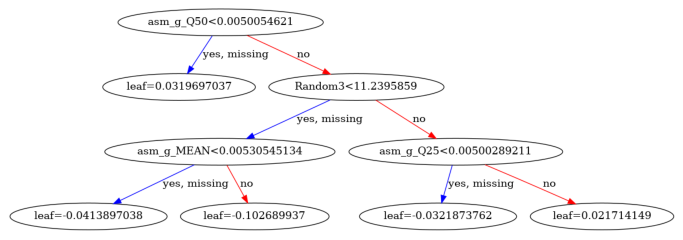

In [35]:
# Visualize the Decision tree (individual obs.)
xgb.plot_tree(f_xgb_model, num_trees=1) # "num_trees" is number of obs.
plt.rcParams['figure.figsize'] = [12, 45]
plt.show()

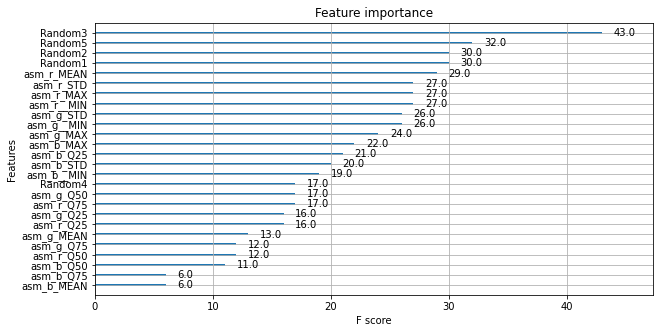

In [37]:
# Importance is calculated as: ”weight” is the number of times a feature appears in a trees
xgb.plot_importance(f_xgb_model, importance_type='weight')
plt.rcParams['figure.figsize'] = [10, 5]
plt.show()

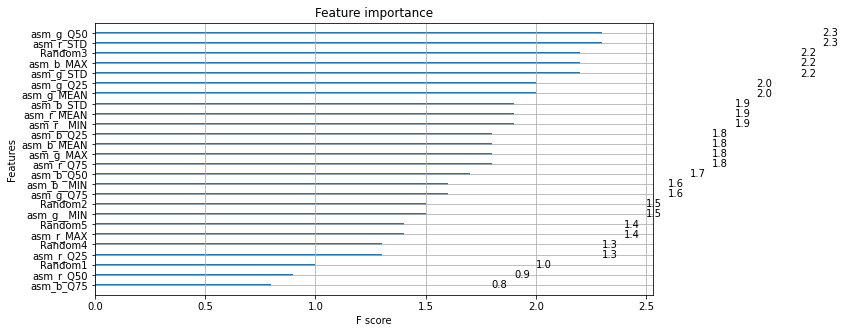

In [38]:
# Importance is calculated as: ”gain” is the average gain of splits which use the feature
# Get the booster from the xgbmodel
booster = f_xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="gain")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key], 1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='gain', show_values=True)

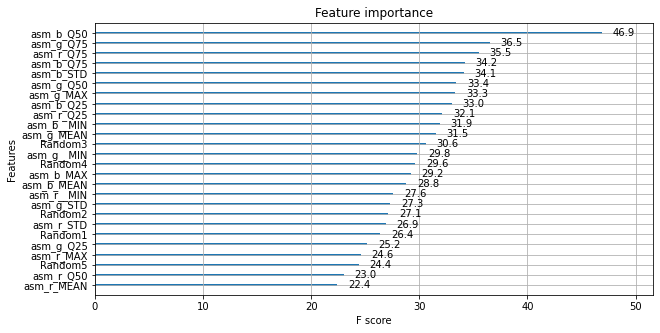

In [39]:
# Importance is calculated as: "cover” is the average coverage of splits which use the feature where coverage is defined as the number of samples affected by the split
# Get the booster from the xgbmodel
booster = f_xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="cover")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key],1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='cover', show_values=True)

# SHAP method

In [40]:
# Load SHAP`s library
import shap

In [41]:
# Сreate an уxplainer object
explainer = shap.TreeExplainer(f_xgb_model)
shap_values = explainer.shap_values(f_X_train)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


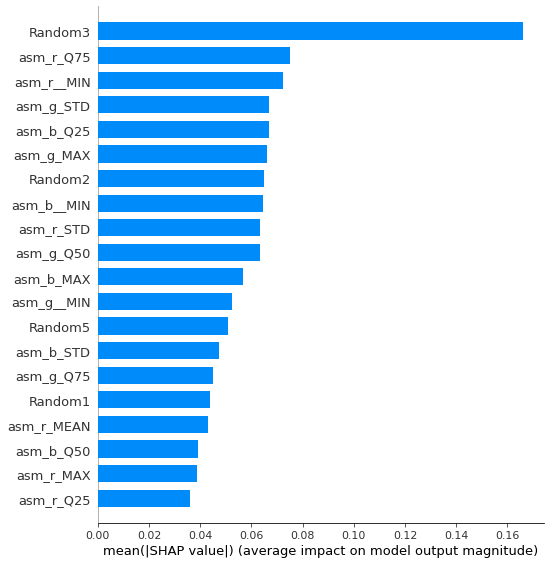

In [42]:
# Mean absolute value of the SHAP values for each feature 
shap.summary_plot(shap_values, f_X_train, plot_type="bar")

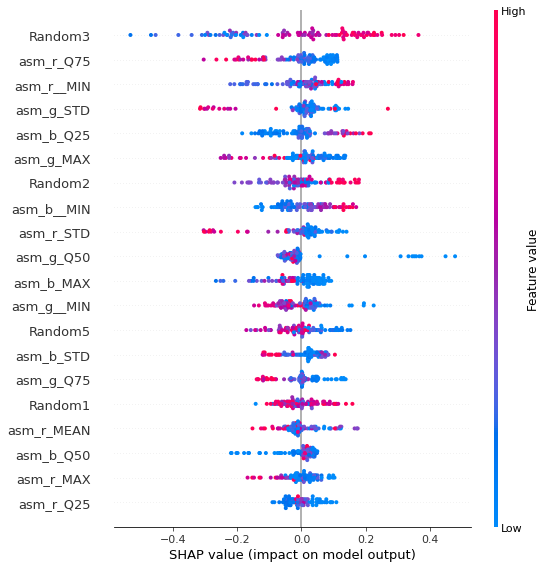

In [43]:
# Graph that summarises the effects of all the features
shap.summary_plot(shap_values, f_X_train)

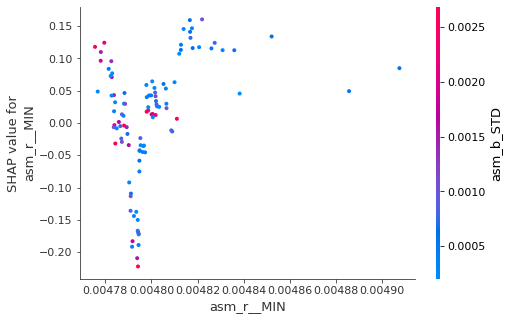

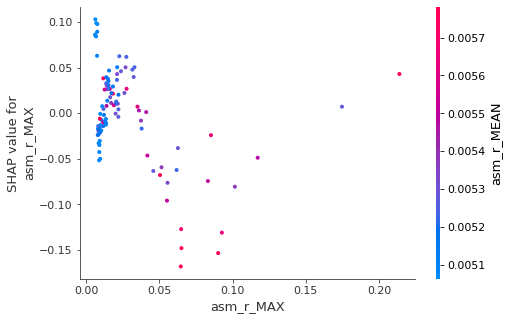

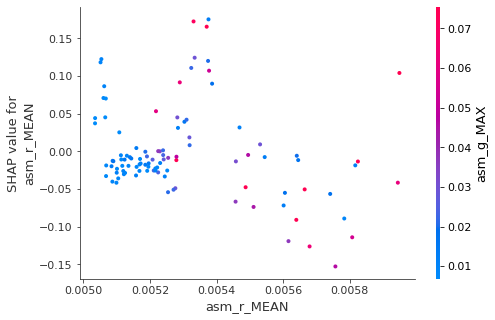

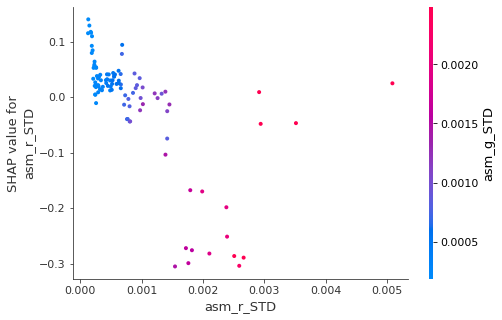

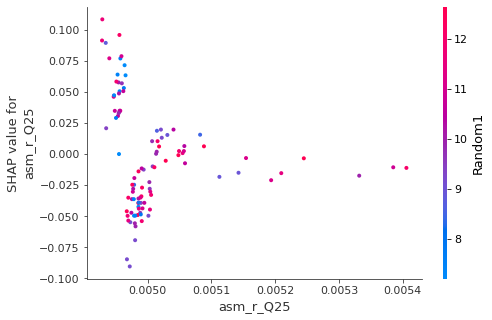

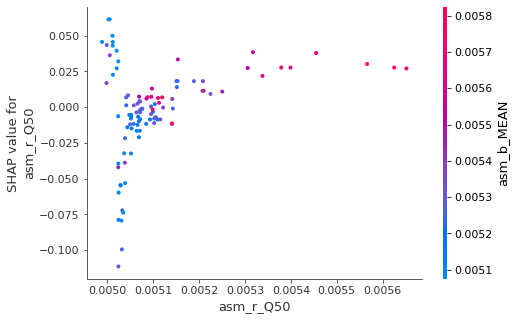

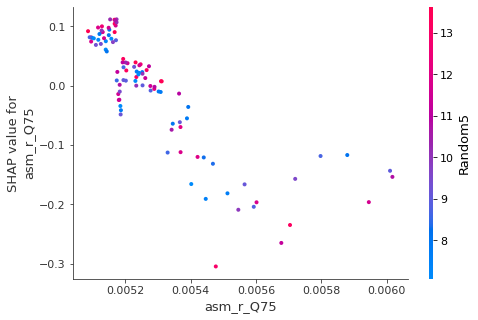

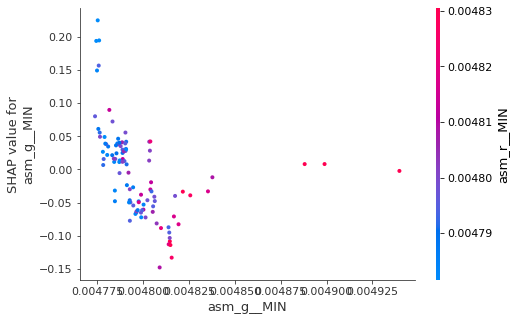

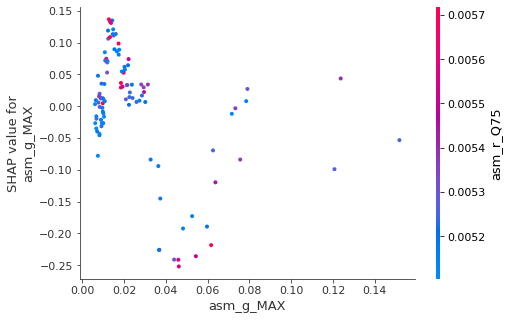

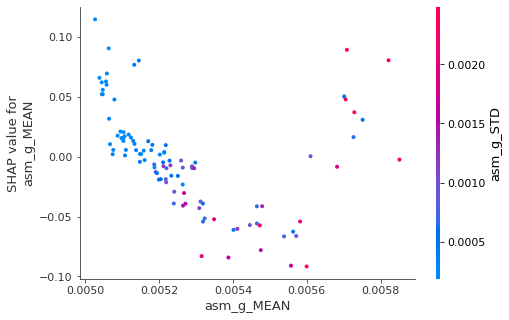

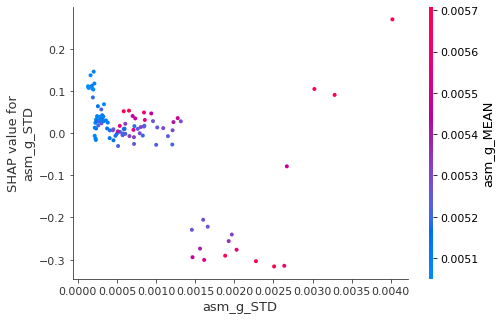

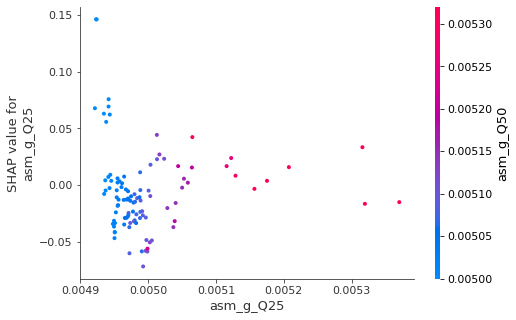

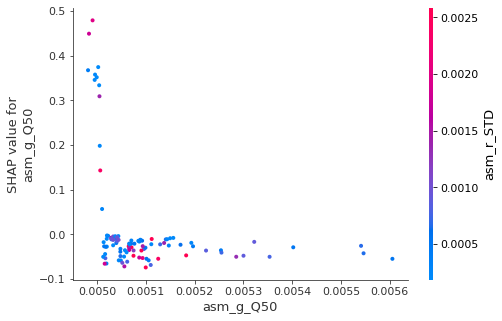

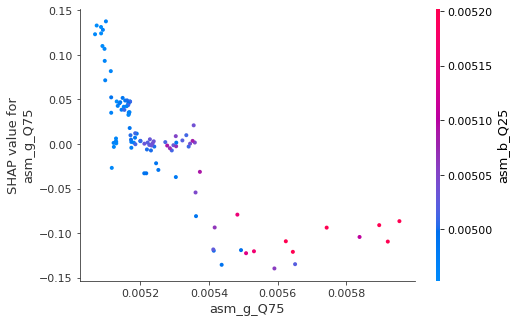

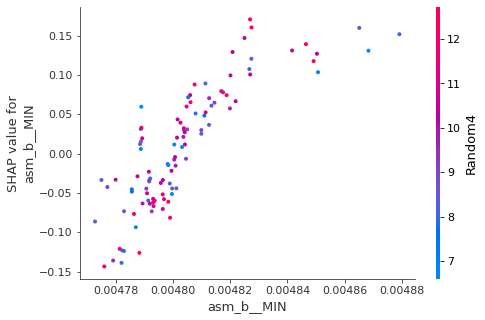

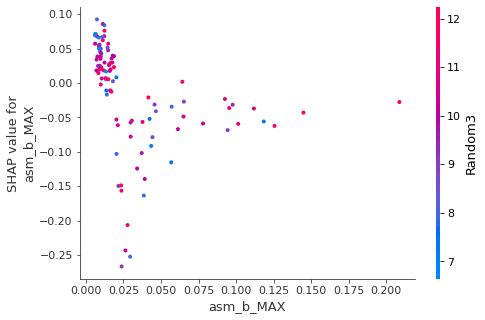

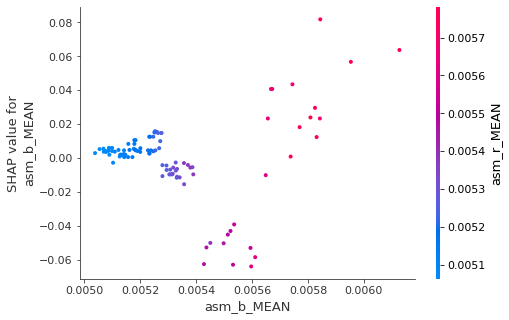

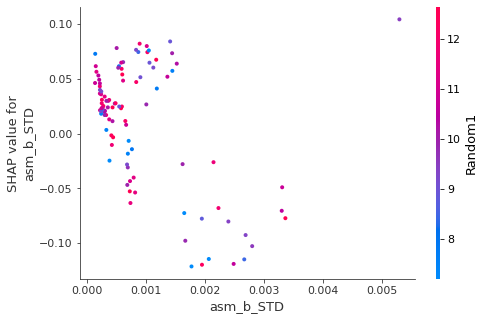

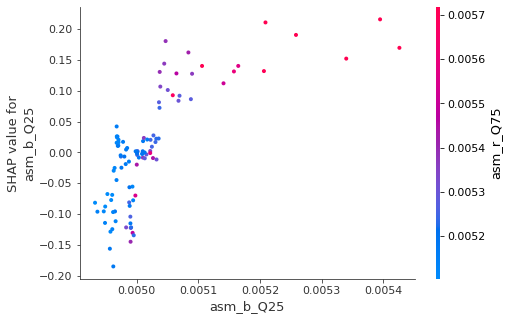

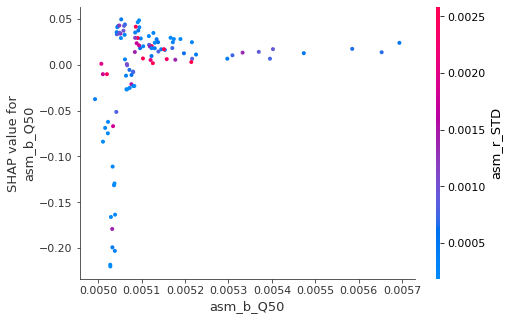

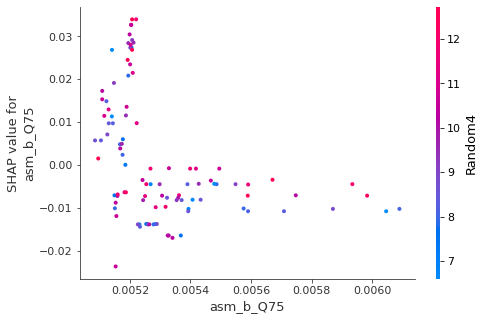

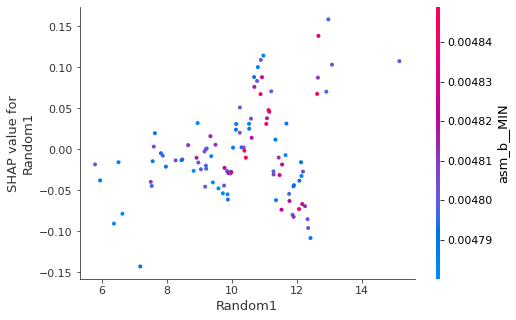

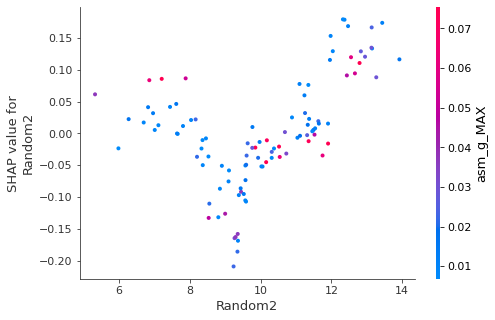

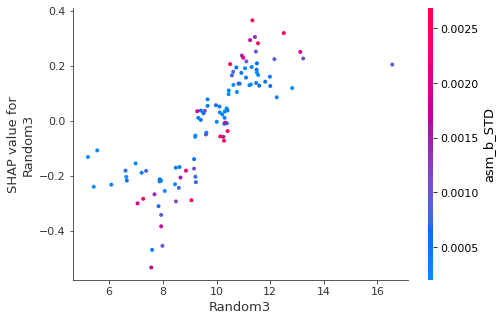

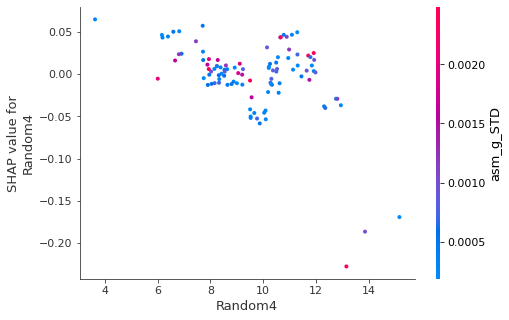

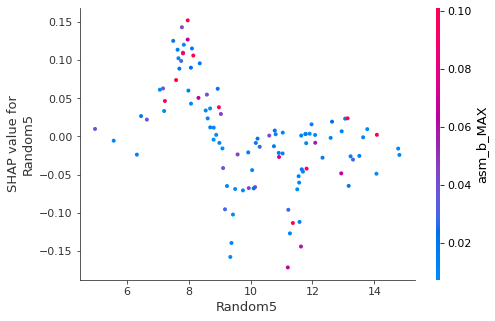

In [44]:
# Create a dependence scatter plot to show the effect of a single feature across the whole dataset
for name in X_train.columns:
    shap.dependence_plot(name, shap_values, f_X_train, color=shap_values)

# *Save XGBoost model*

In [ ]:
# Save to JSON
f_xgb_model.save_model("/home/dima/Desktop/JupyterLab/GIS and ML algoritms/5_Processing_data_for_level_sites/UAV_ln_Cs_XGB_model.json")
# Save to text format
f_xgb_model.save_model("/home/dima/Desktop/JupyterLab/GIS and ML algoritms/5_Processing_data_for_level_sites/UAV_ln_Cs_XGB_model.txt")